**TASK**:
Calculate the bias and variance of a dataset that is not sampled yet, and then predict the degree of the best fit curve

# Header files included

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import numpy as np 
import random
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Some global variables that can be used to check specific outputs

In [15]:
debug = 1  # 1 if you want to see the variable values during the program execution
graphing = 1  # 1 to see the necessary graphs

# STEP 1: LOADING THE DATASET AND VISUALISING IT

### Load the dataset:

In [16]:
#TODO: read dataset
f  = open('data.pkl', 'rb')
data_set = pd.read_pickle("data.pkl")
data_set_size = len(data_set)
data_set = pd.DataFrame(data_set)
f.close()



In [17]:
if(debug == 1):
    print(data_set)
    print(data_set_size)

          0          1
0     0.000   2.000000
1     0.001   2.026000
2     0.002   2.051997
3     0.003   2.077990
4     0.004   2.103975
...     ...        ...
4995  4.995 -22.012296
4996  4.996 -21.995270
4997  4.997 -21.978154
4998  4.998 -21.960949
4999  4.999 -21.943657

[5000 rows x 2 columns]
5000





### Split The Dataset Into X and Y

In [18]:
#TODO: put first column of data_set into x, and the second column into y
x = data_set.iloc[:,0].values
y = data_set.iloc[:,1].values

    
print(x)
print(y)

[0.000e+00 1.000e-03 2.000e-03 ... 4.997e+00 4.998e+00 4.999e+00]
[  2.           2.02599961   2.05199691 ... -21.97815382 -21.96094878
 -21.94365718]


### Graphing the given dataset

In [19]:
# plot the data

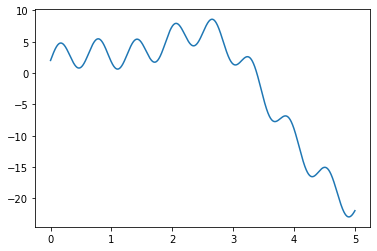

In [20]:
plt.plot(x,y)

## STEP 2: RESAMPLING DATA SETS

In [21]:
#TODO: split the data into xTrain, xTest, yTrain, yTest
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.1, random_state=3)
test_data_size = len(xTest)
train_data_size = len(xTrain)

if(debug == 1):
    print(test_data_size)
    print(train_data_size)

500
4500


### Split The Training Dataset Into 10 Different Training Datasets

In [22]:
# Use Kfolds to split the data into 10 folds

X_train_data_sets = []
Y_train_data_sets = []

kf = KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf.split(xTrain):
    X_train, x_sampled = xTrain[train_index], xTrain[test_index]
    y_train, y_sampled = yTrain[train_index], yTrain[test_index]
    X_train_data_sets.append(x_sampled)
    Y_train_data_sets.append(y_sampled)


### Graphing Each Of The Training Datasets

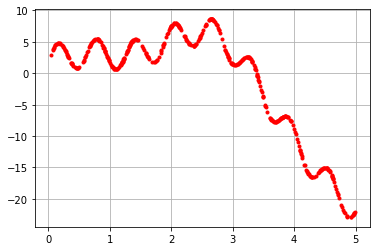

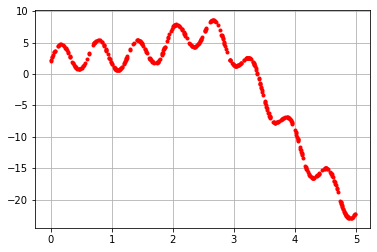

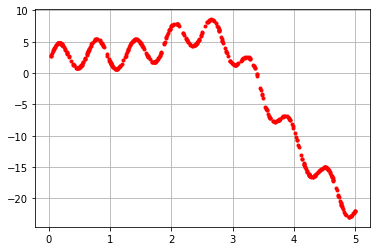

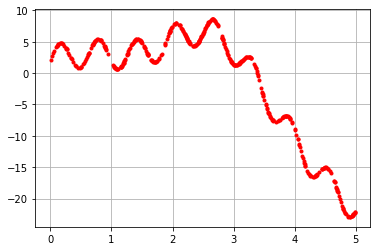

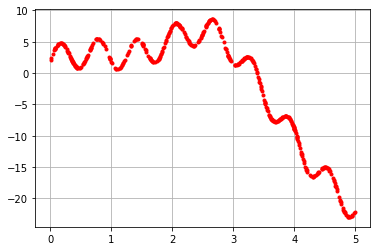

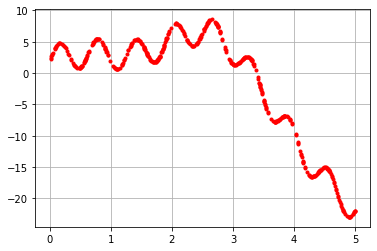

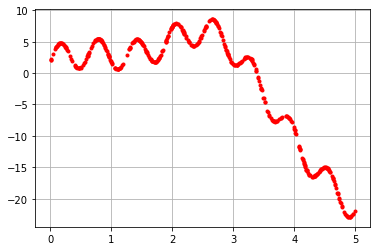

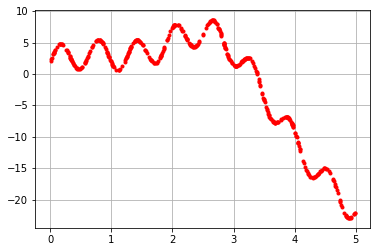

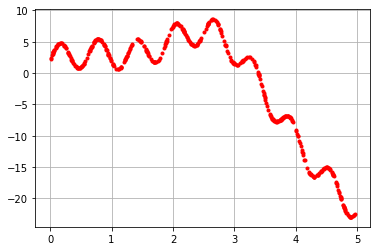

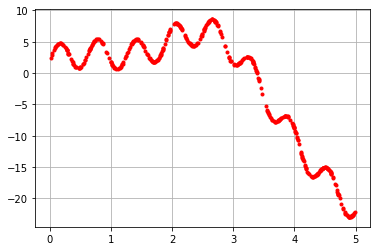

In [23]:
if(debug == 1):
    for i in range(10):
      plt.plot(X_train_data_sets[i],Y_train_data_sets[i],'r.')
      plt.grid()
      plt.show()
        


## STEP 3: TRAINING A MODEL

## Plotting A Graph Of The Trained Polynomial Regression Model

TRAINING SET  0


<Figure size 432x288 with 0 Axes>

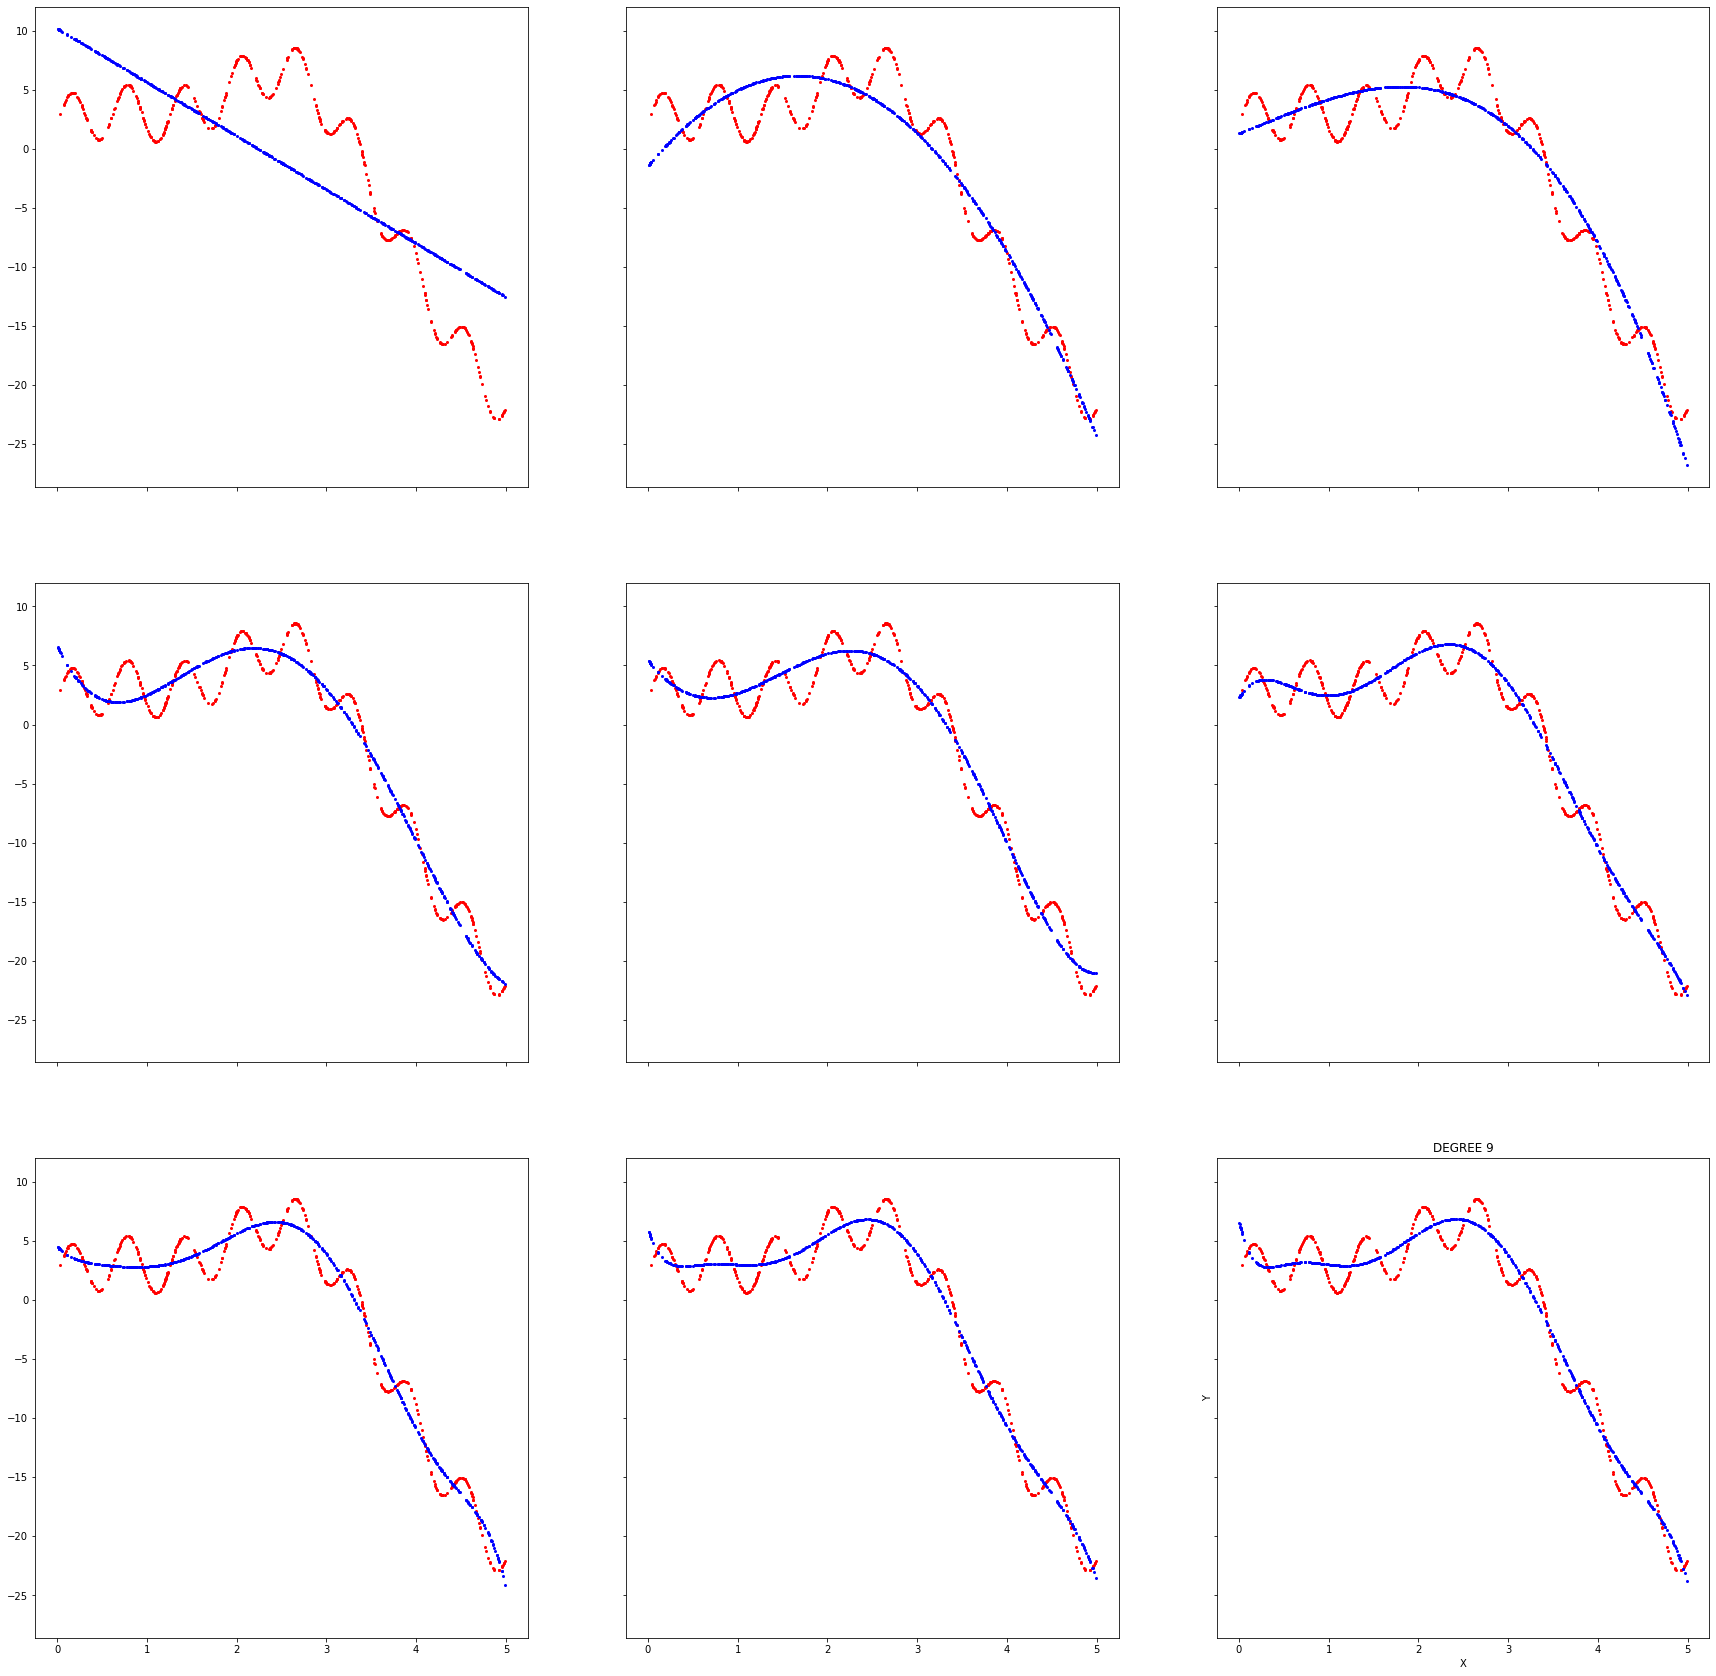

TRAINING SET  1


<Figure size 432x288 with 0 Axes>

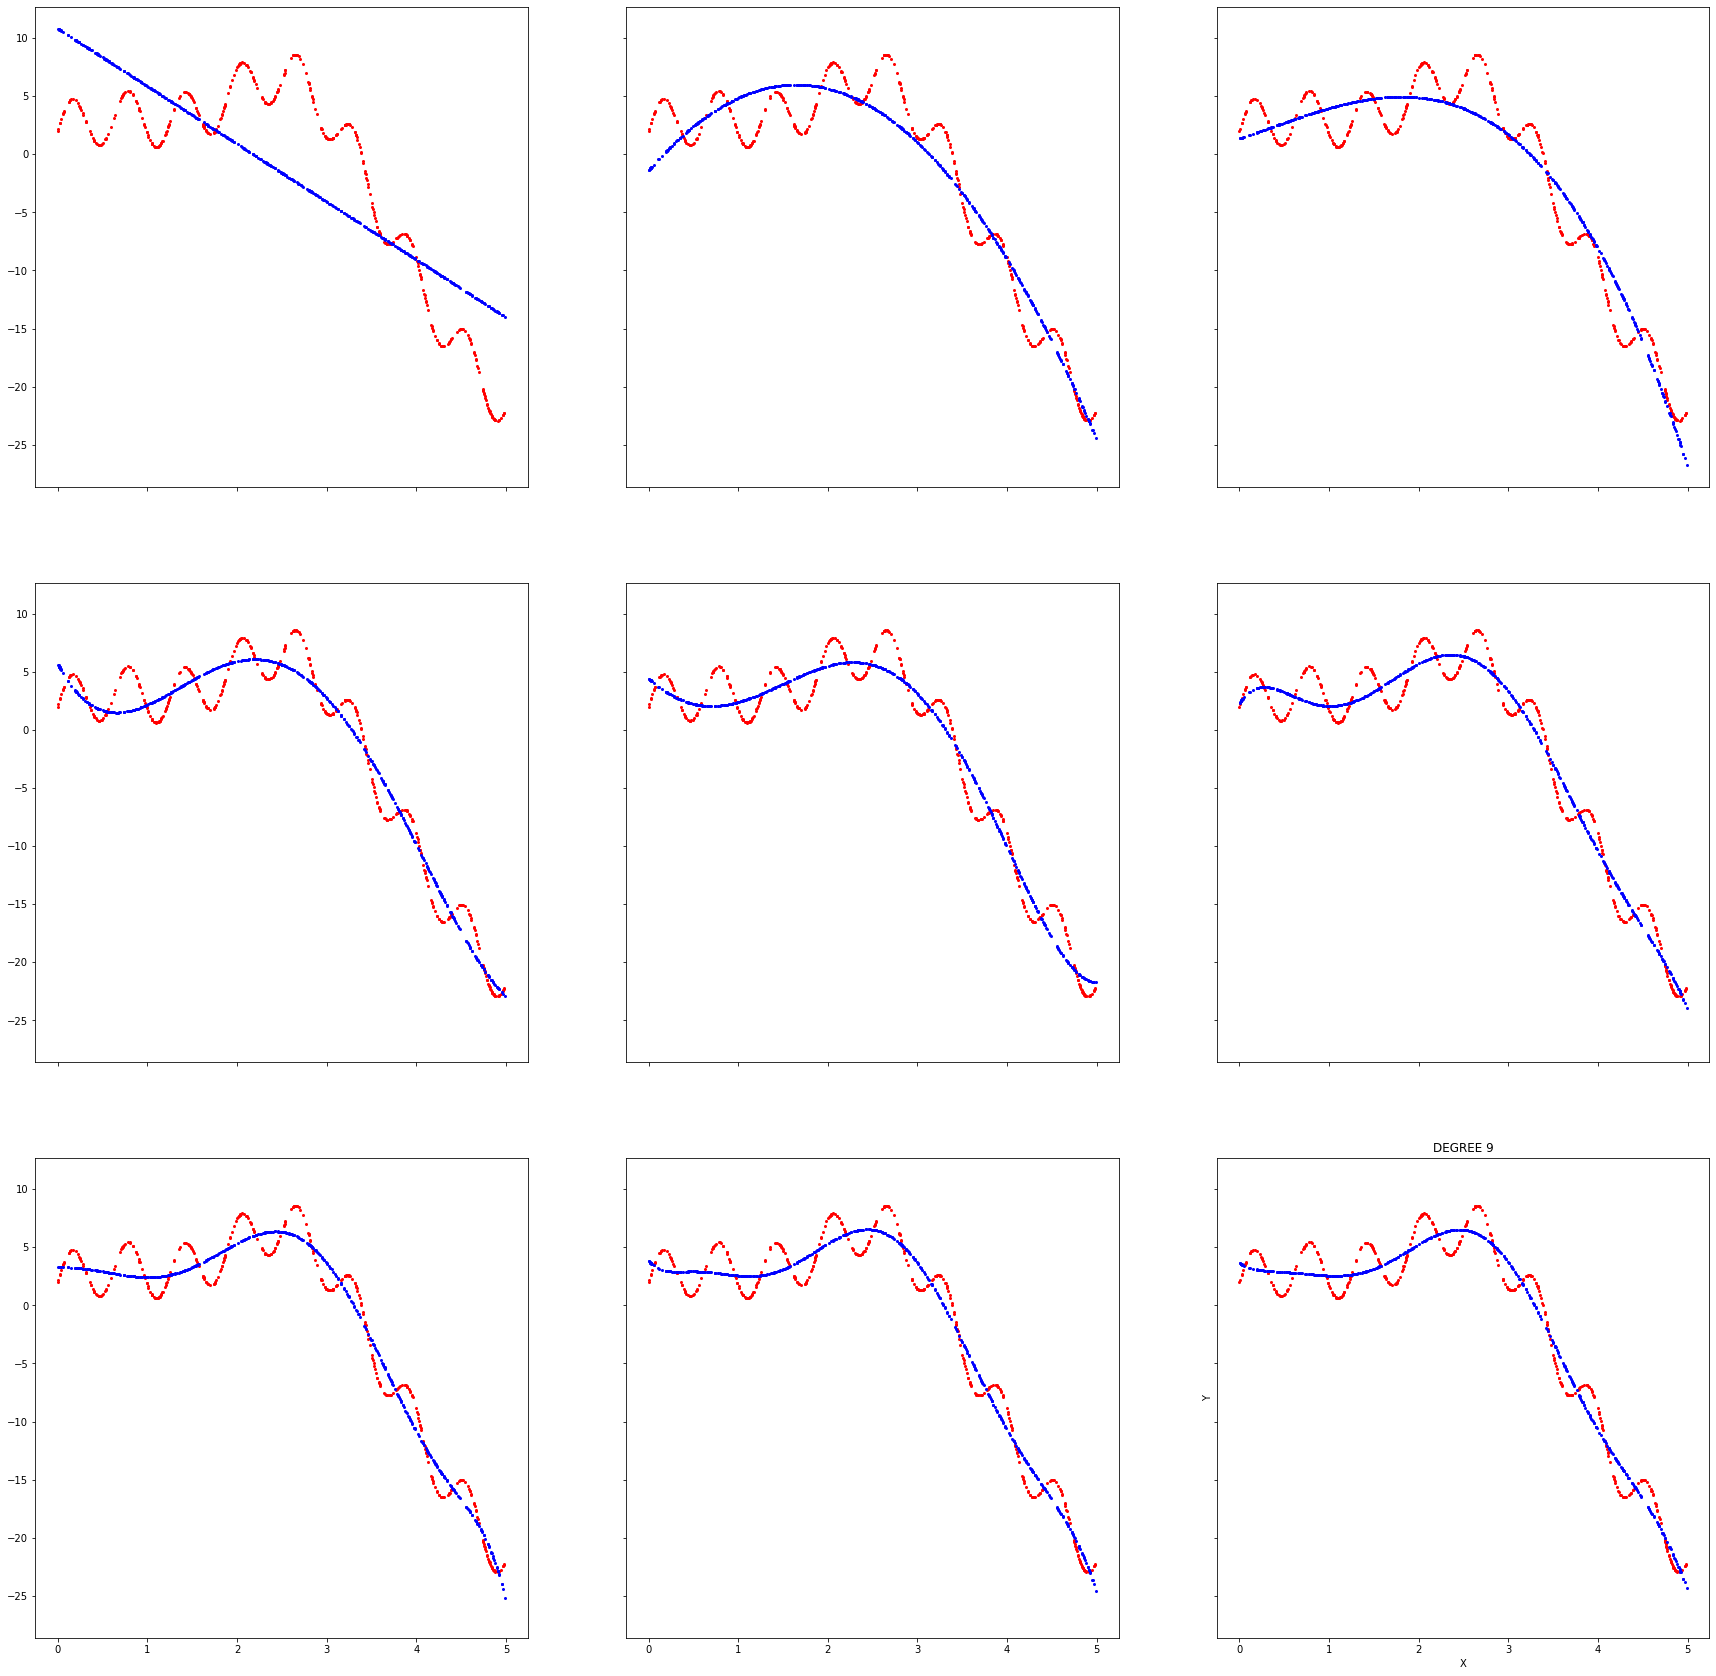

TRAINING SET  2


<Figure size 432x288 with 0 Axes>

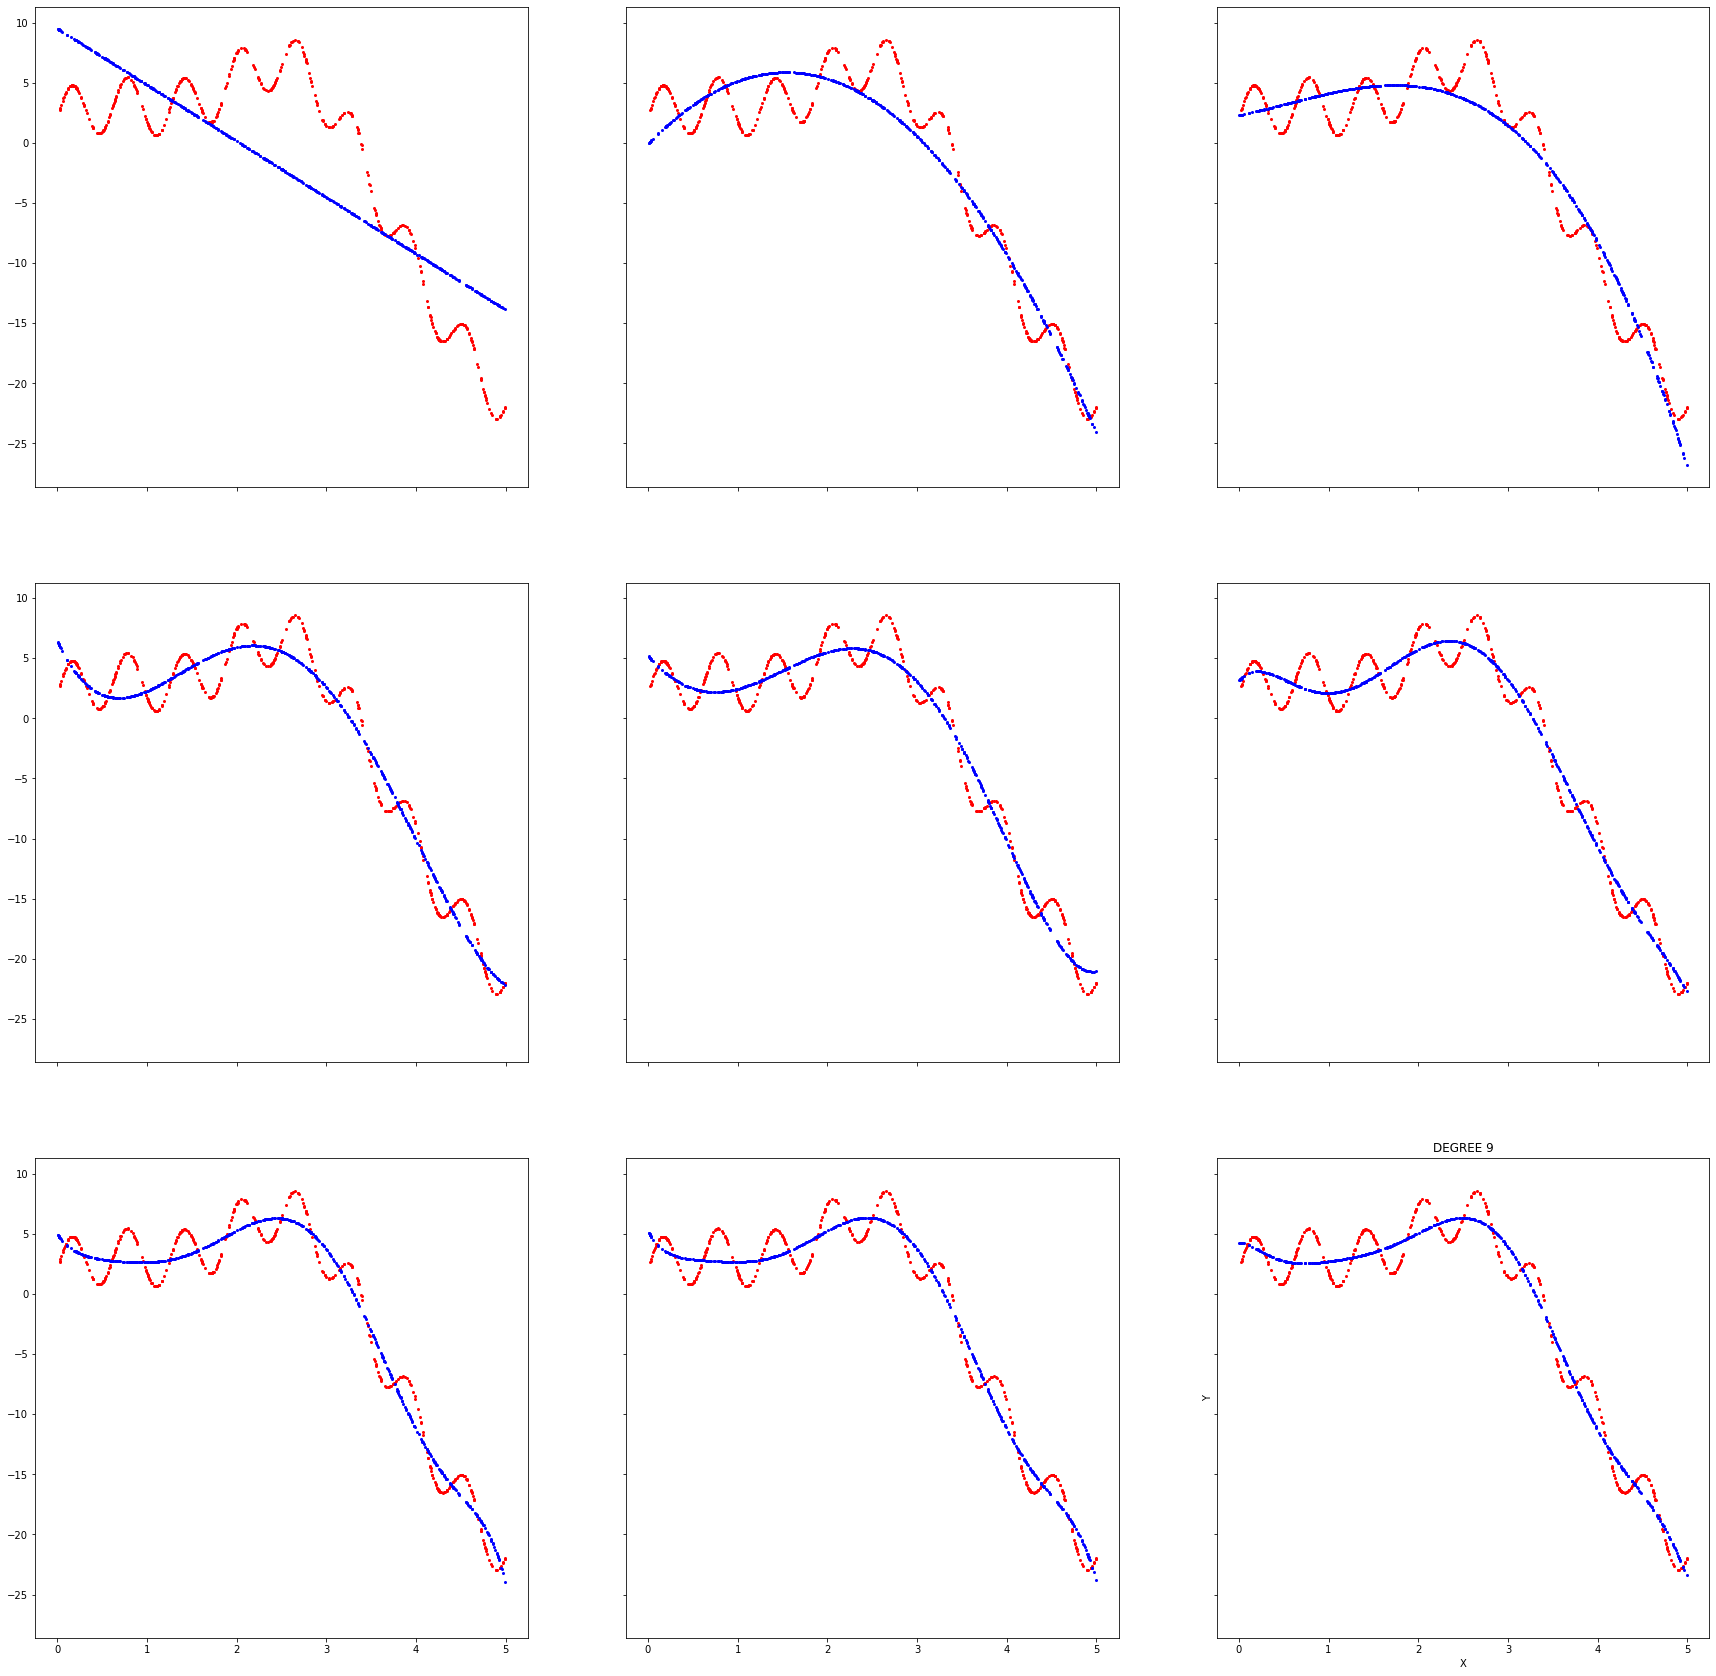

TRAINING SET  3


<Figure size 432x288 with 0 Axes>

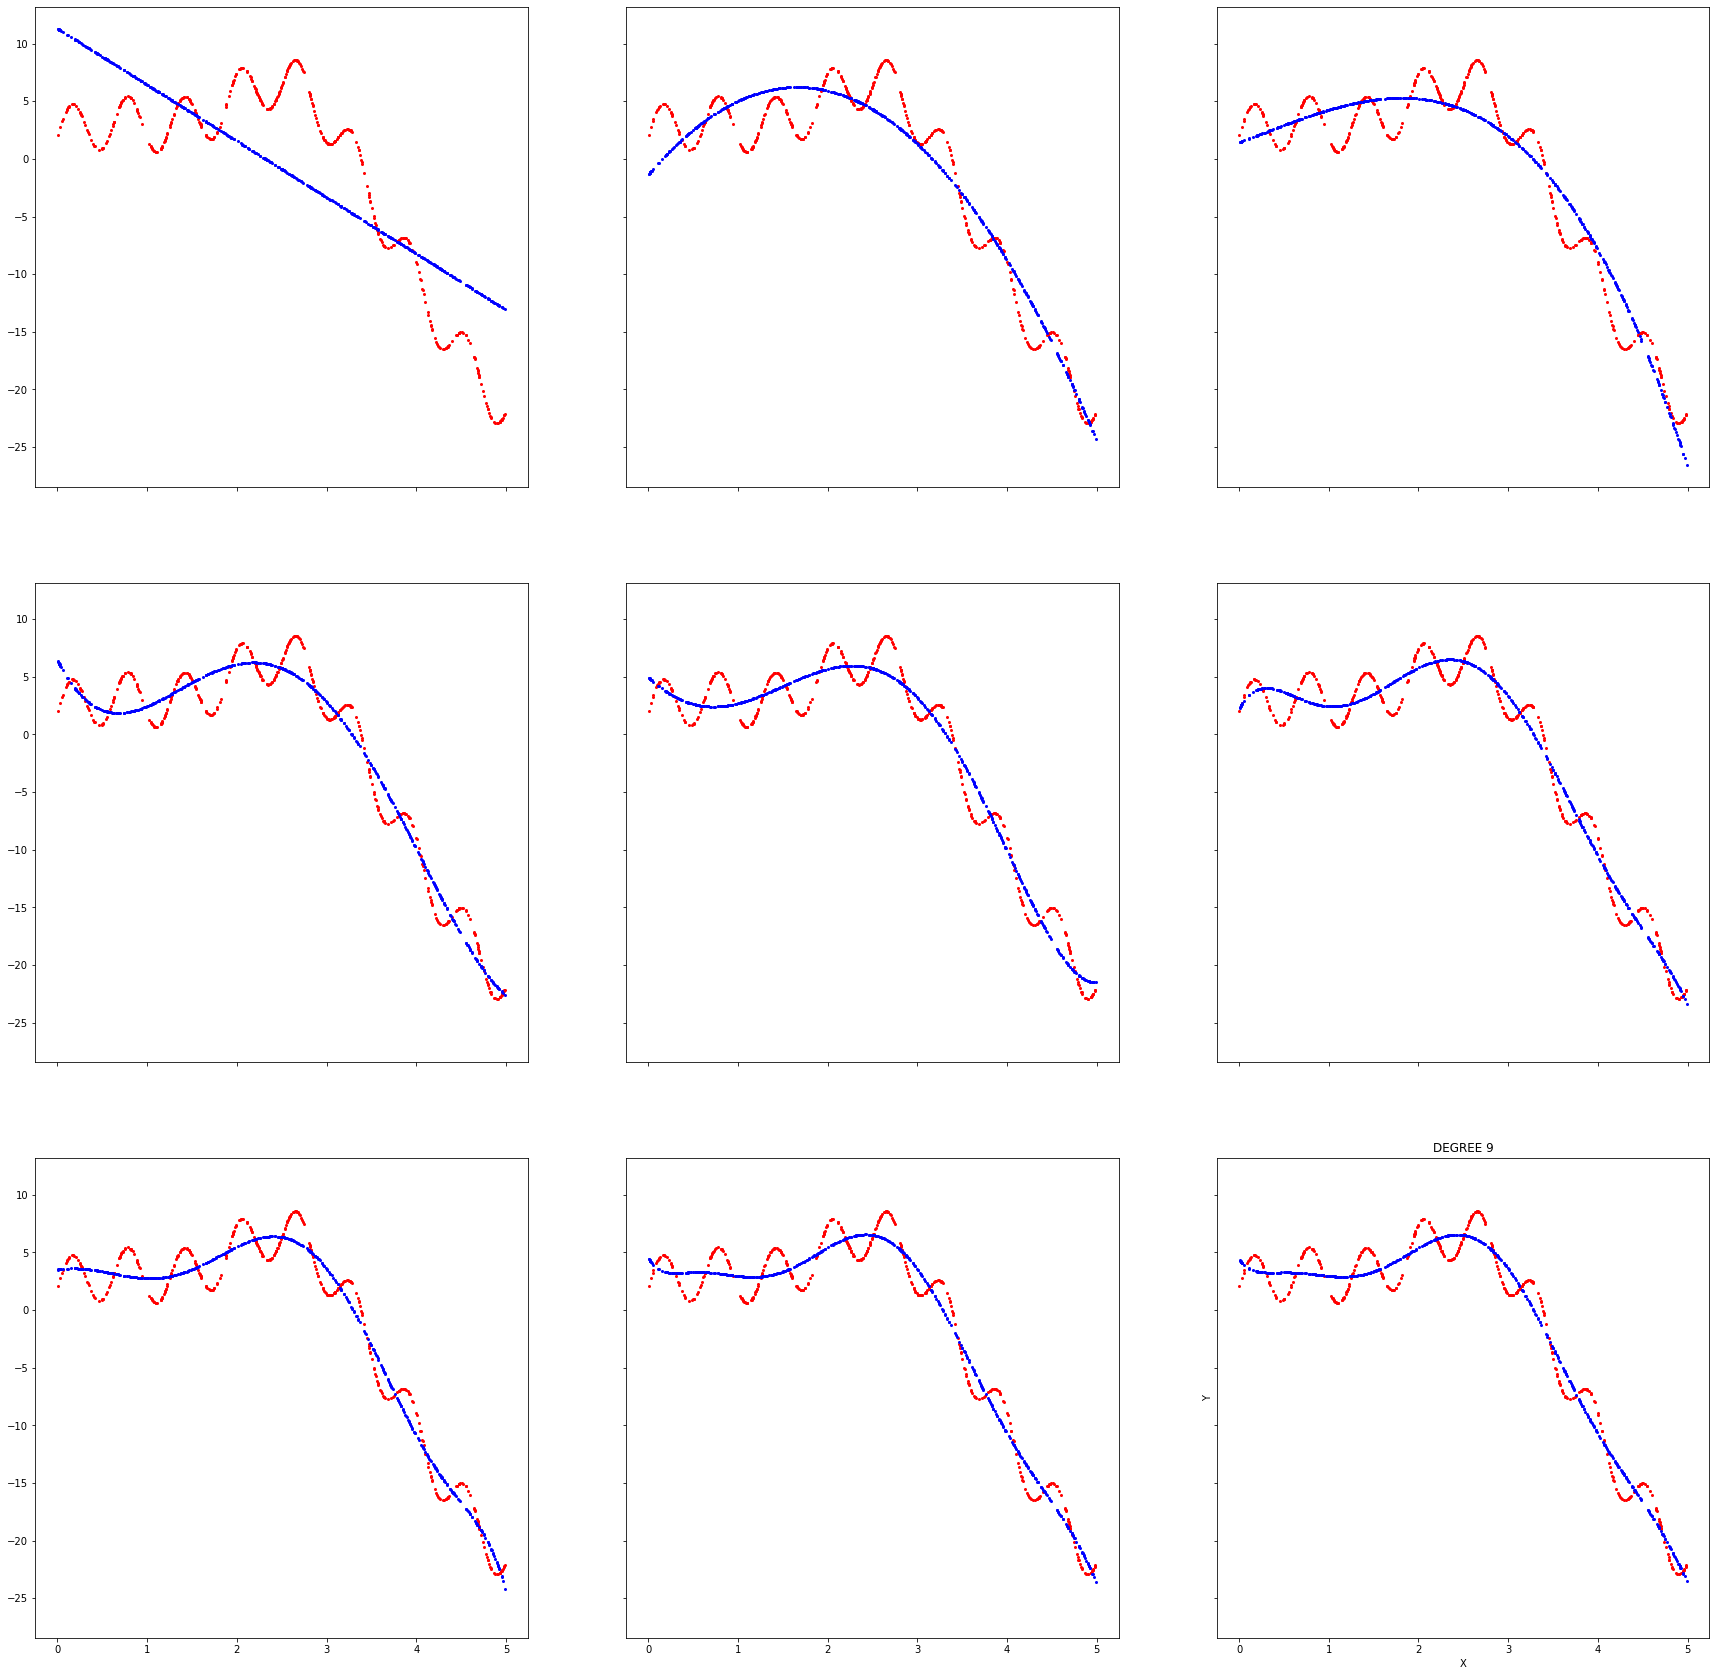

TRAINING SET  4


<Figure size 432x288 with 0 Axes>

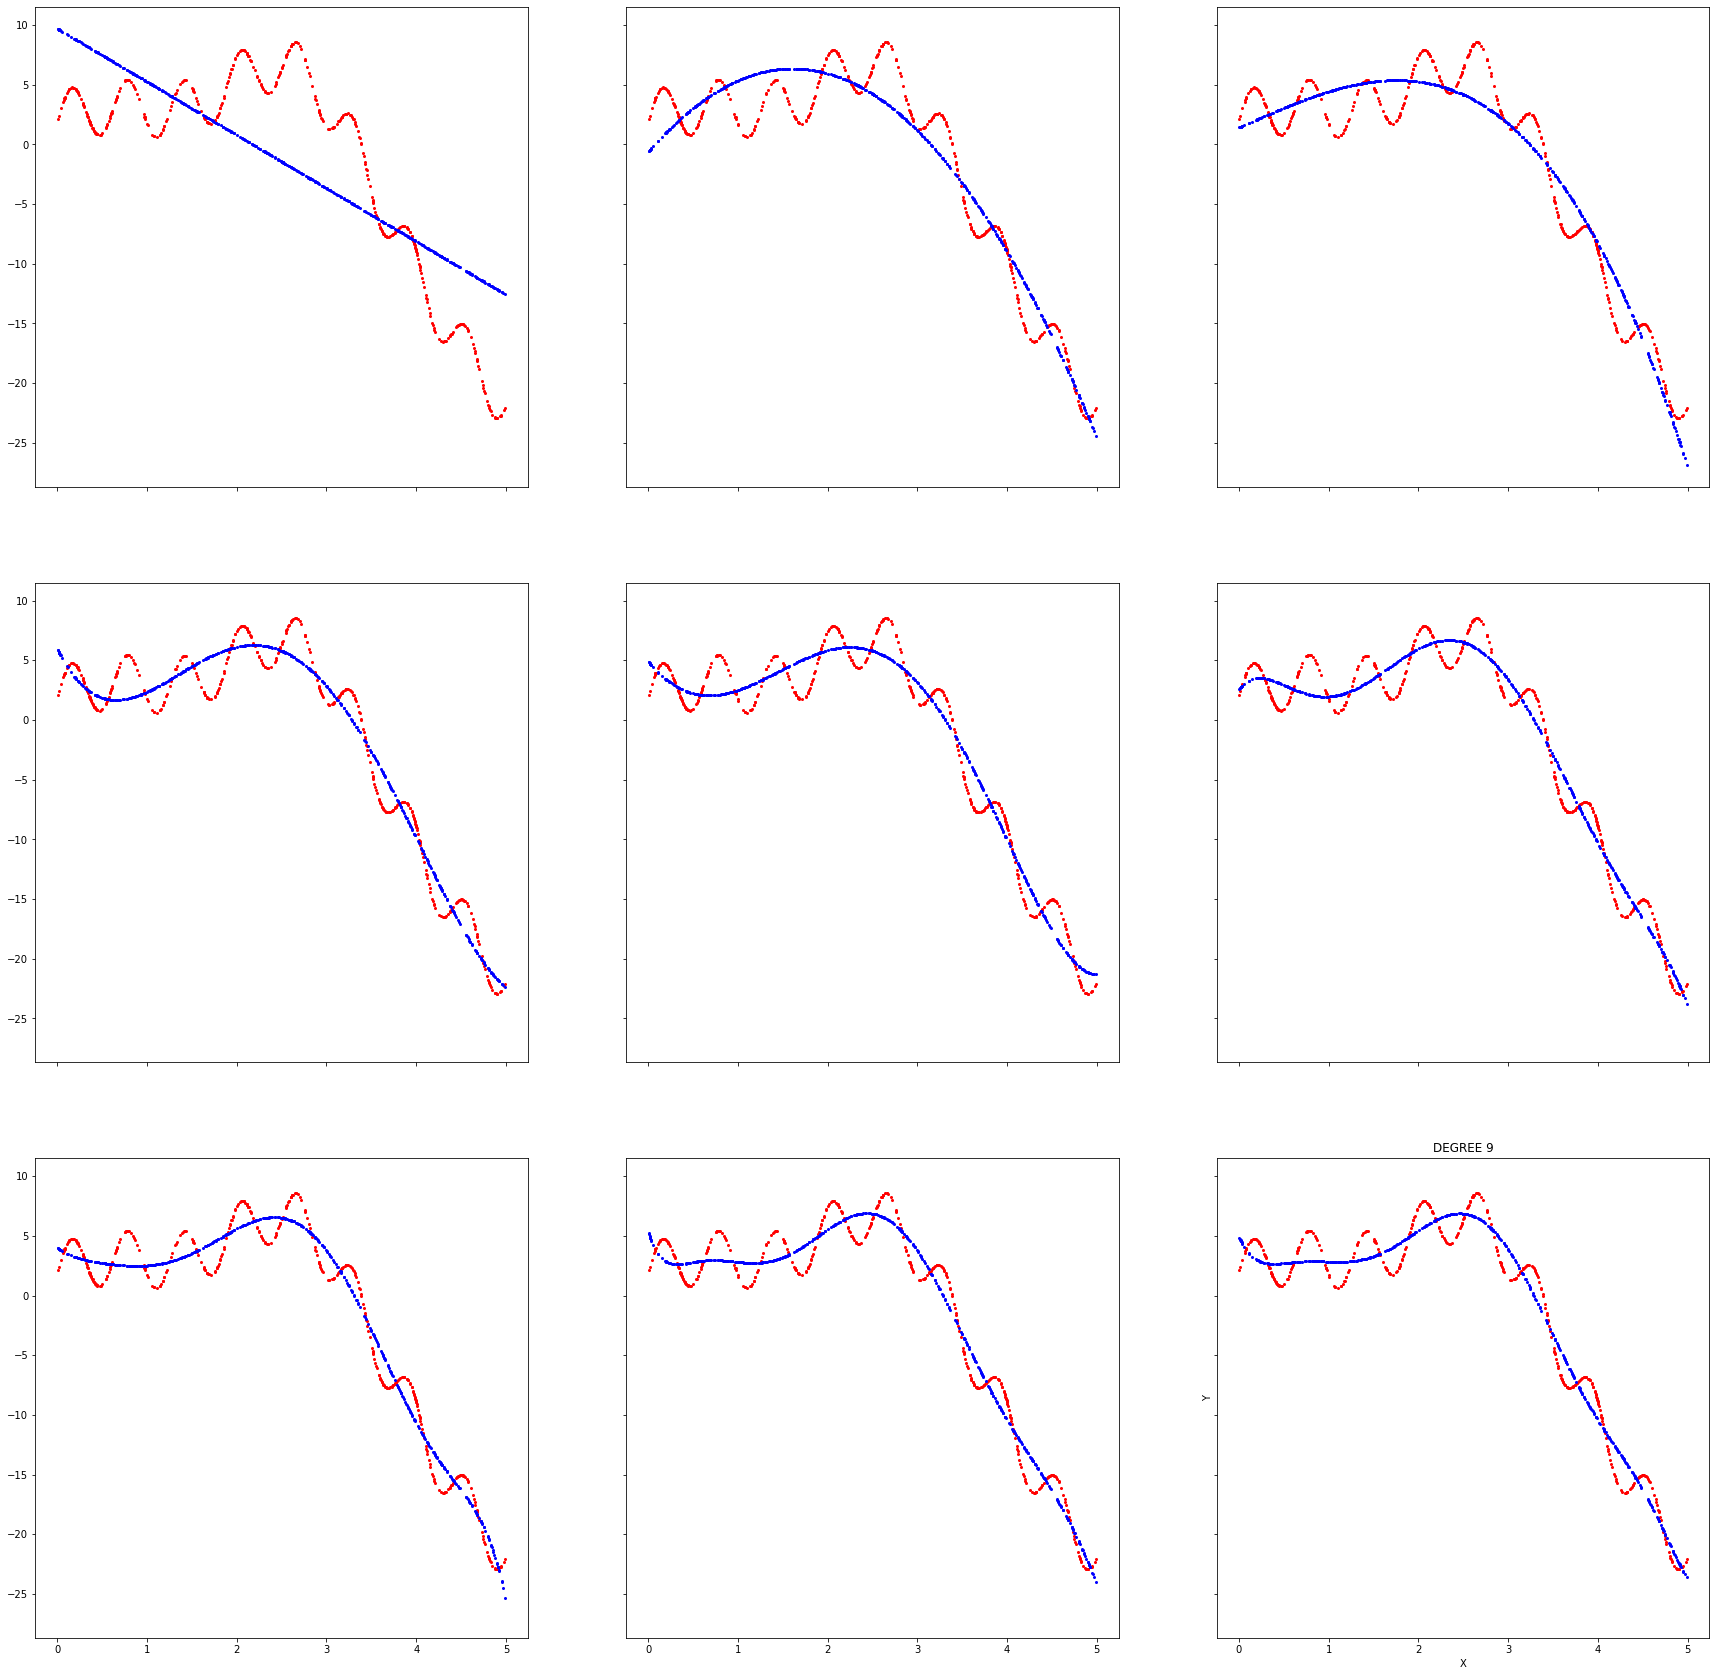

TRAINING SET  5


<Figure size 432x288 with 0 Axes>

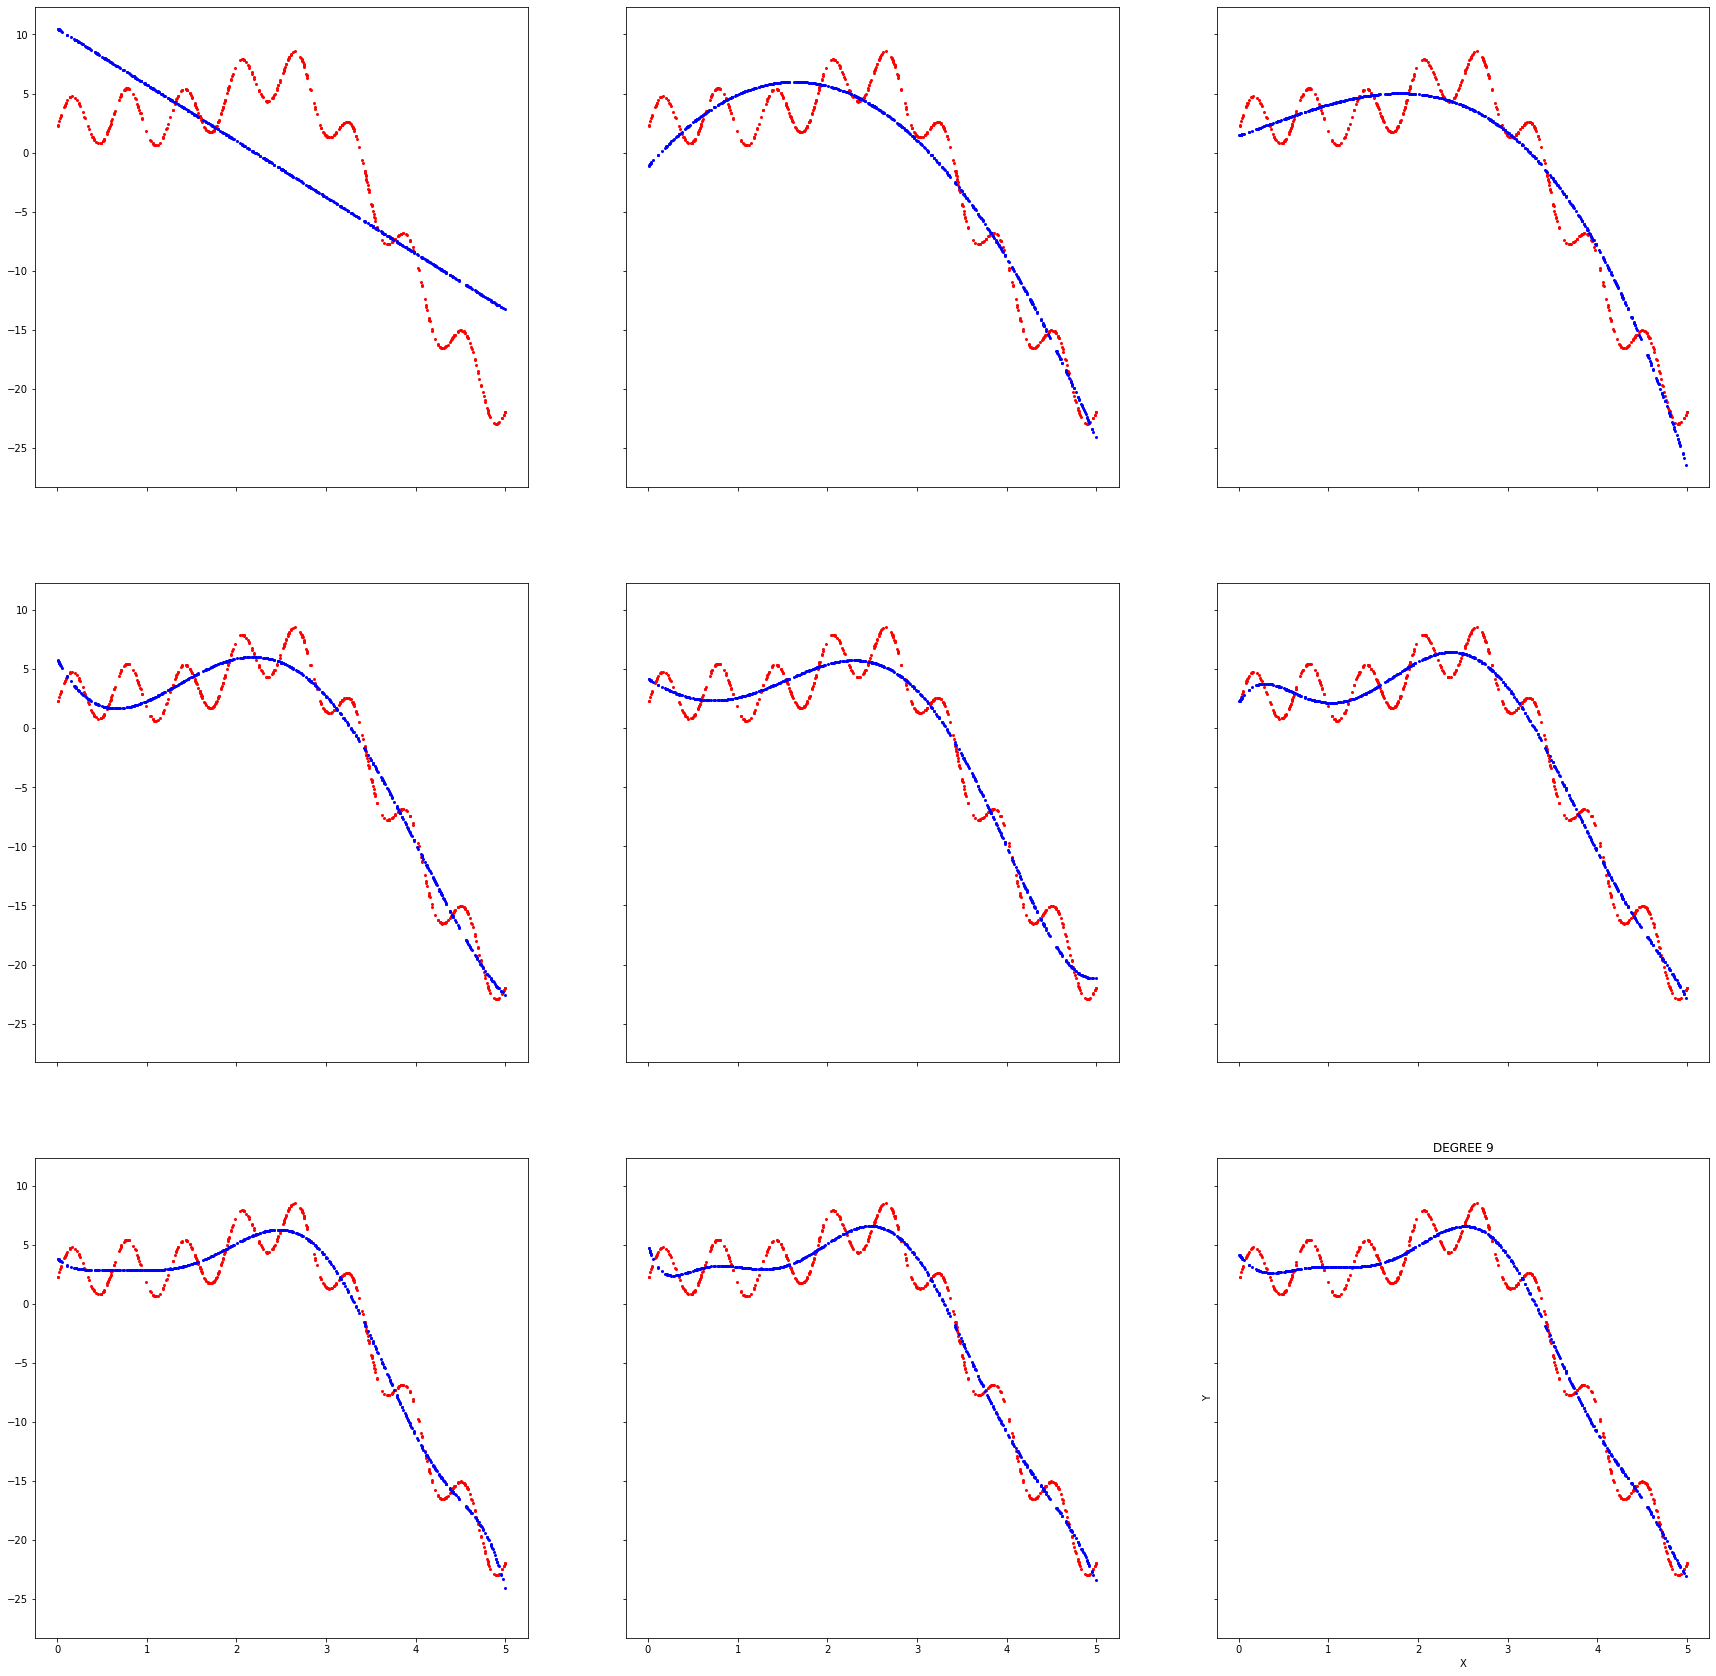

TRAINING SET  6


<Figure size 432x288 with 0 Axes>

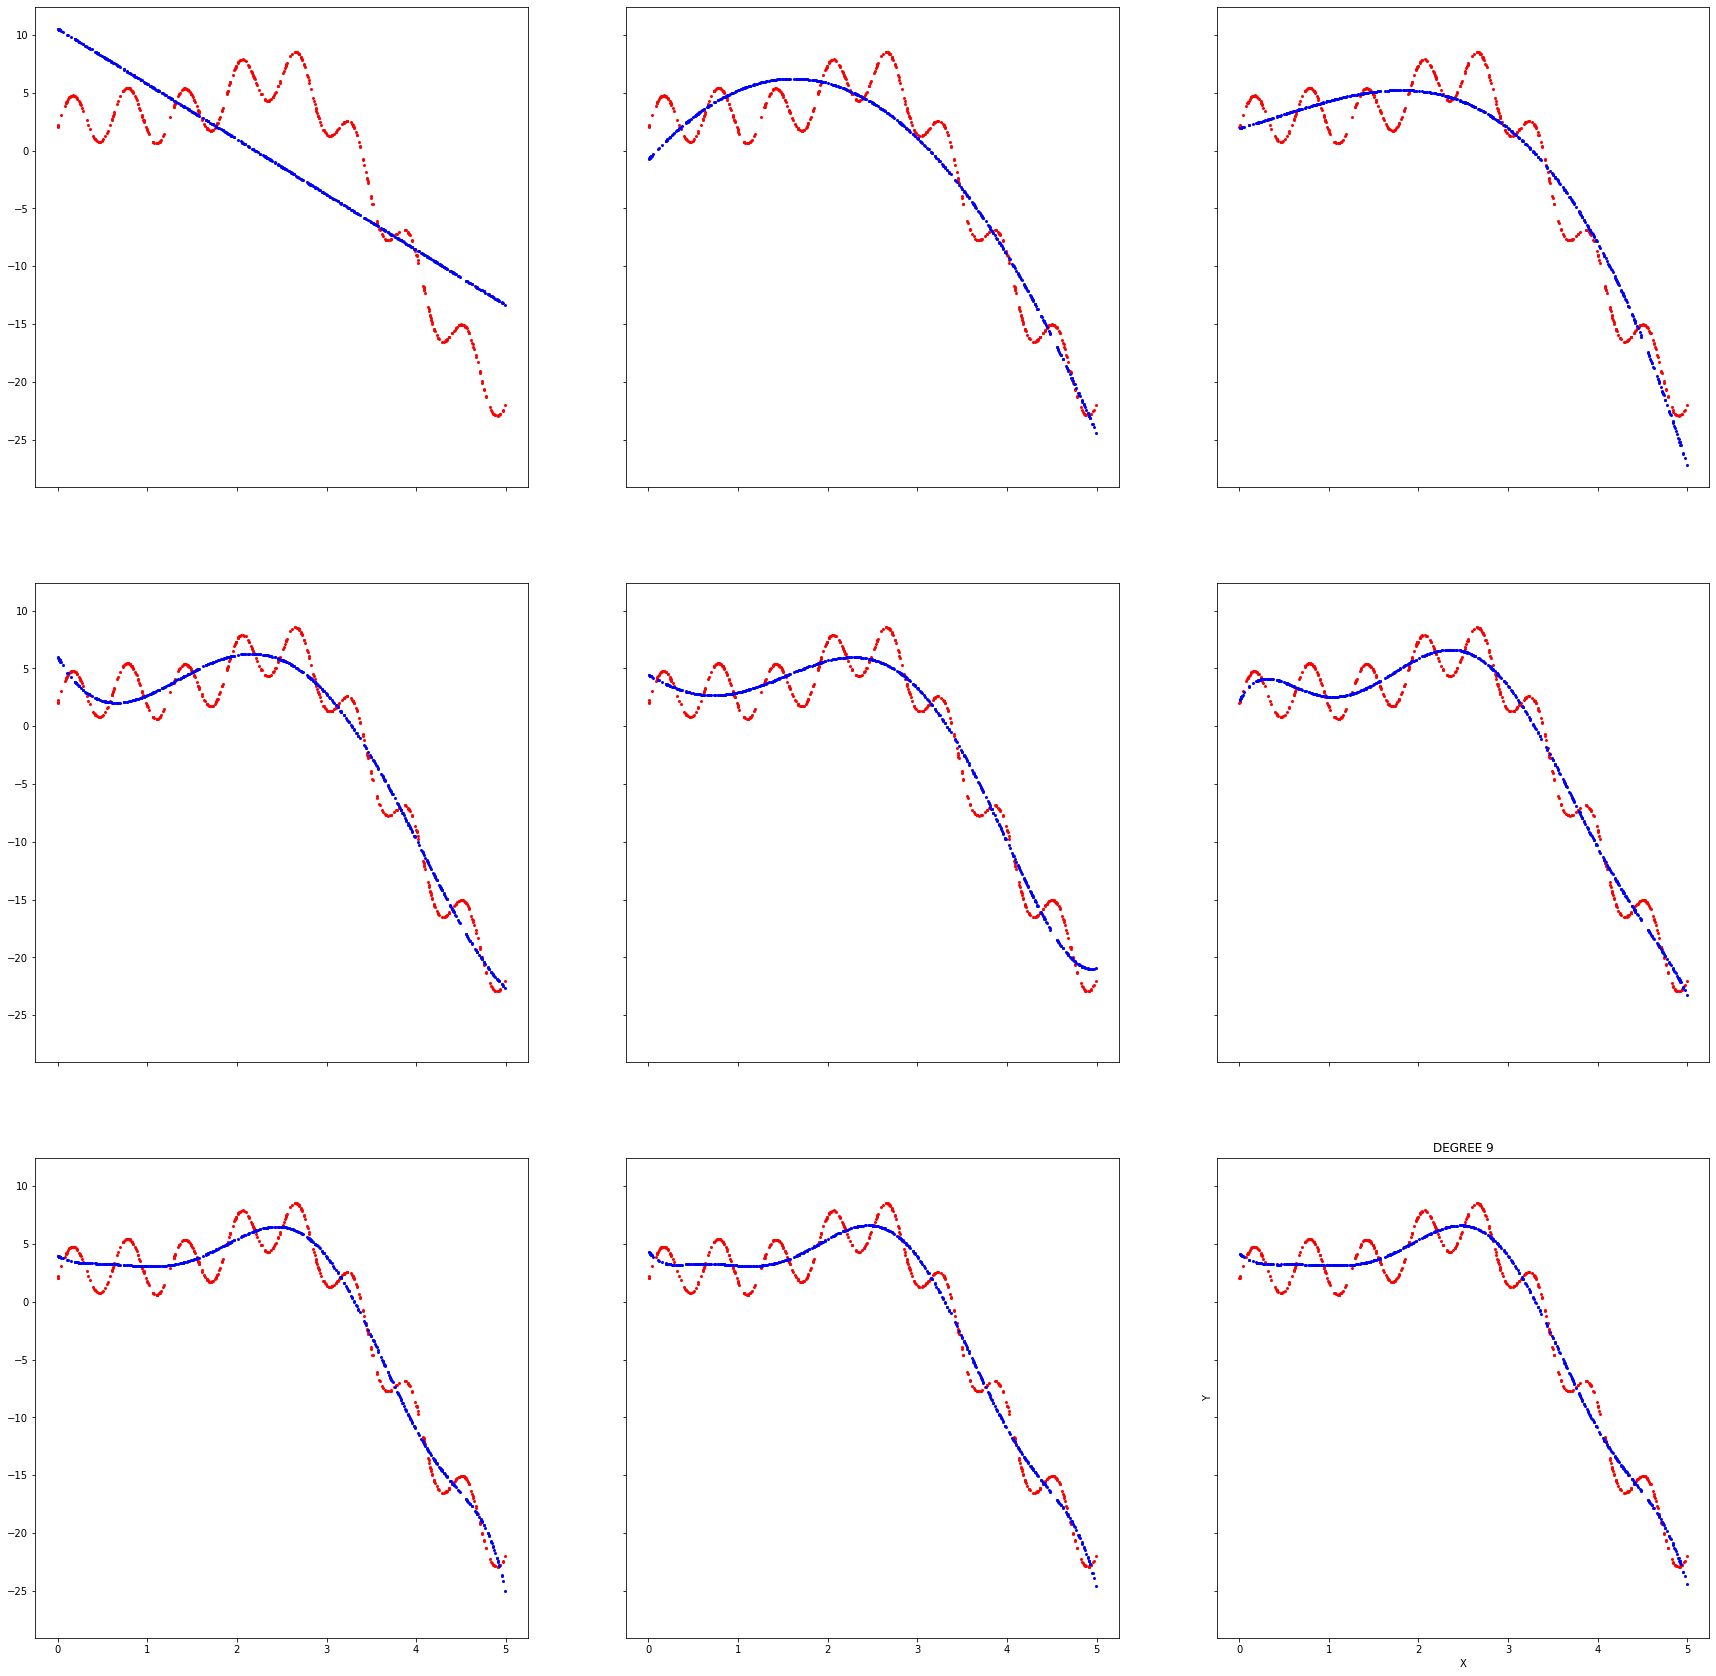

TRAINING SET  7


<Figure size 432x288 with 0 Axes>

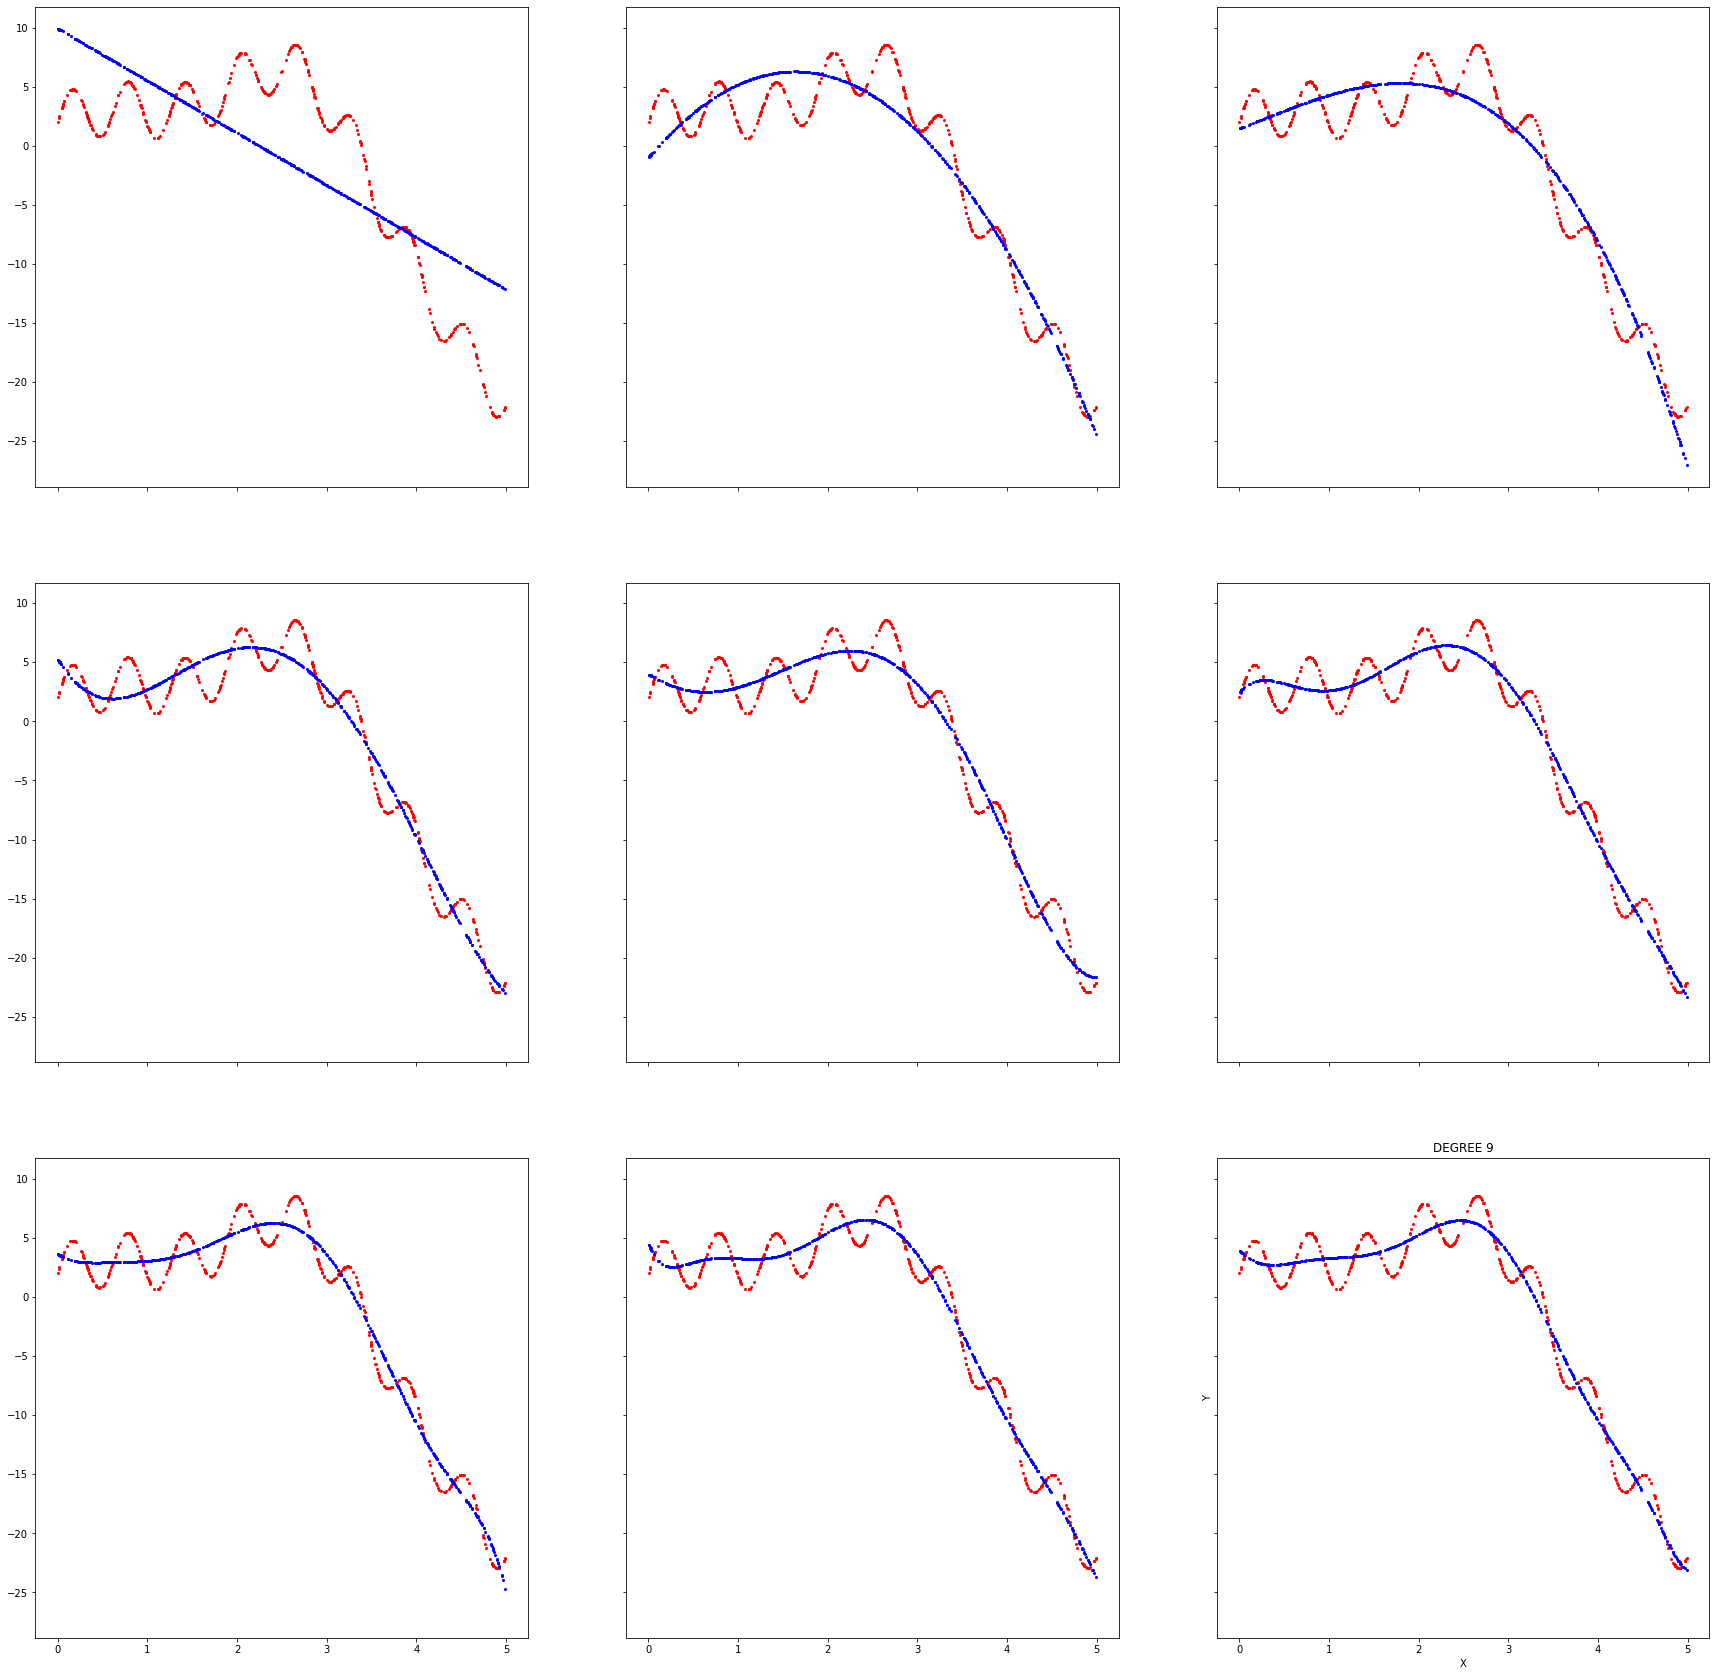

TRAINING SET  8


<Figure size 432x288 with 0 Axes>

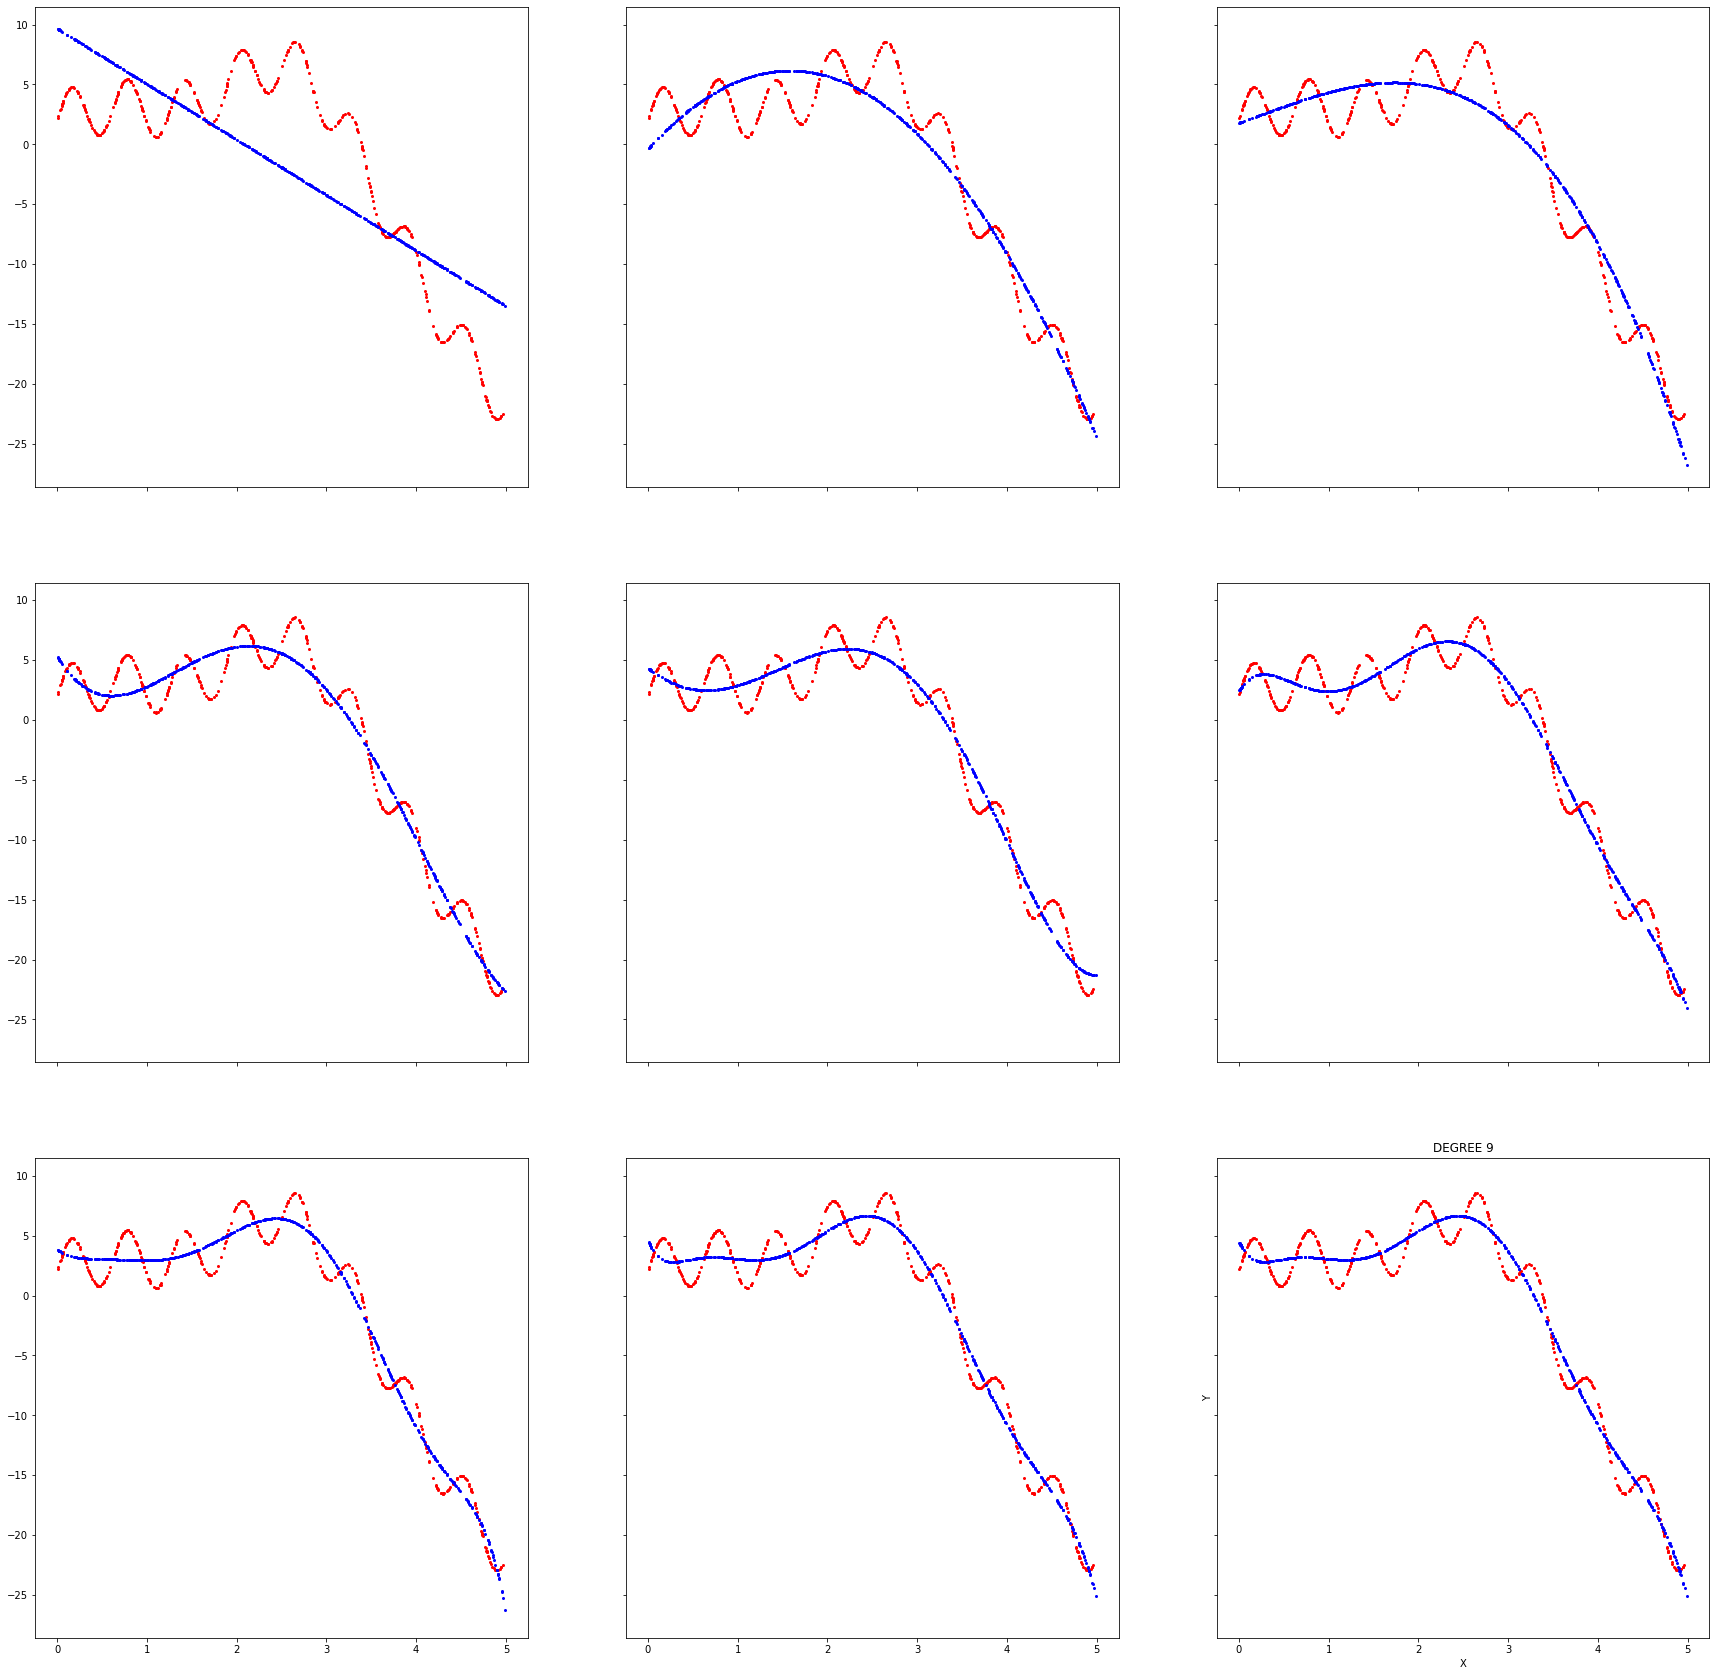

TRAINING SET  9


<Figure size 432x288 with 0 Axes>

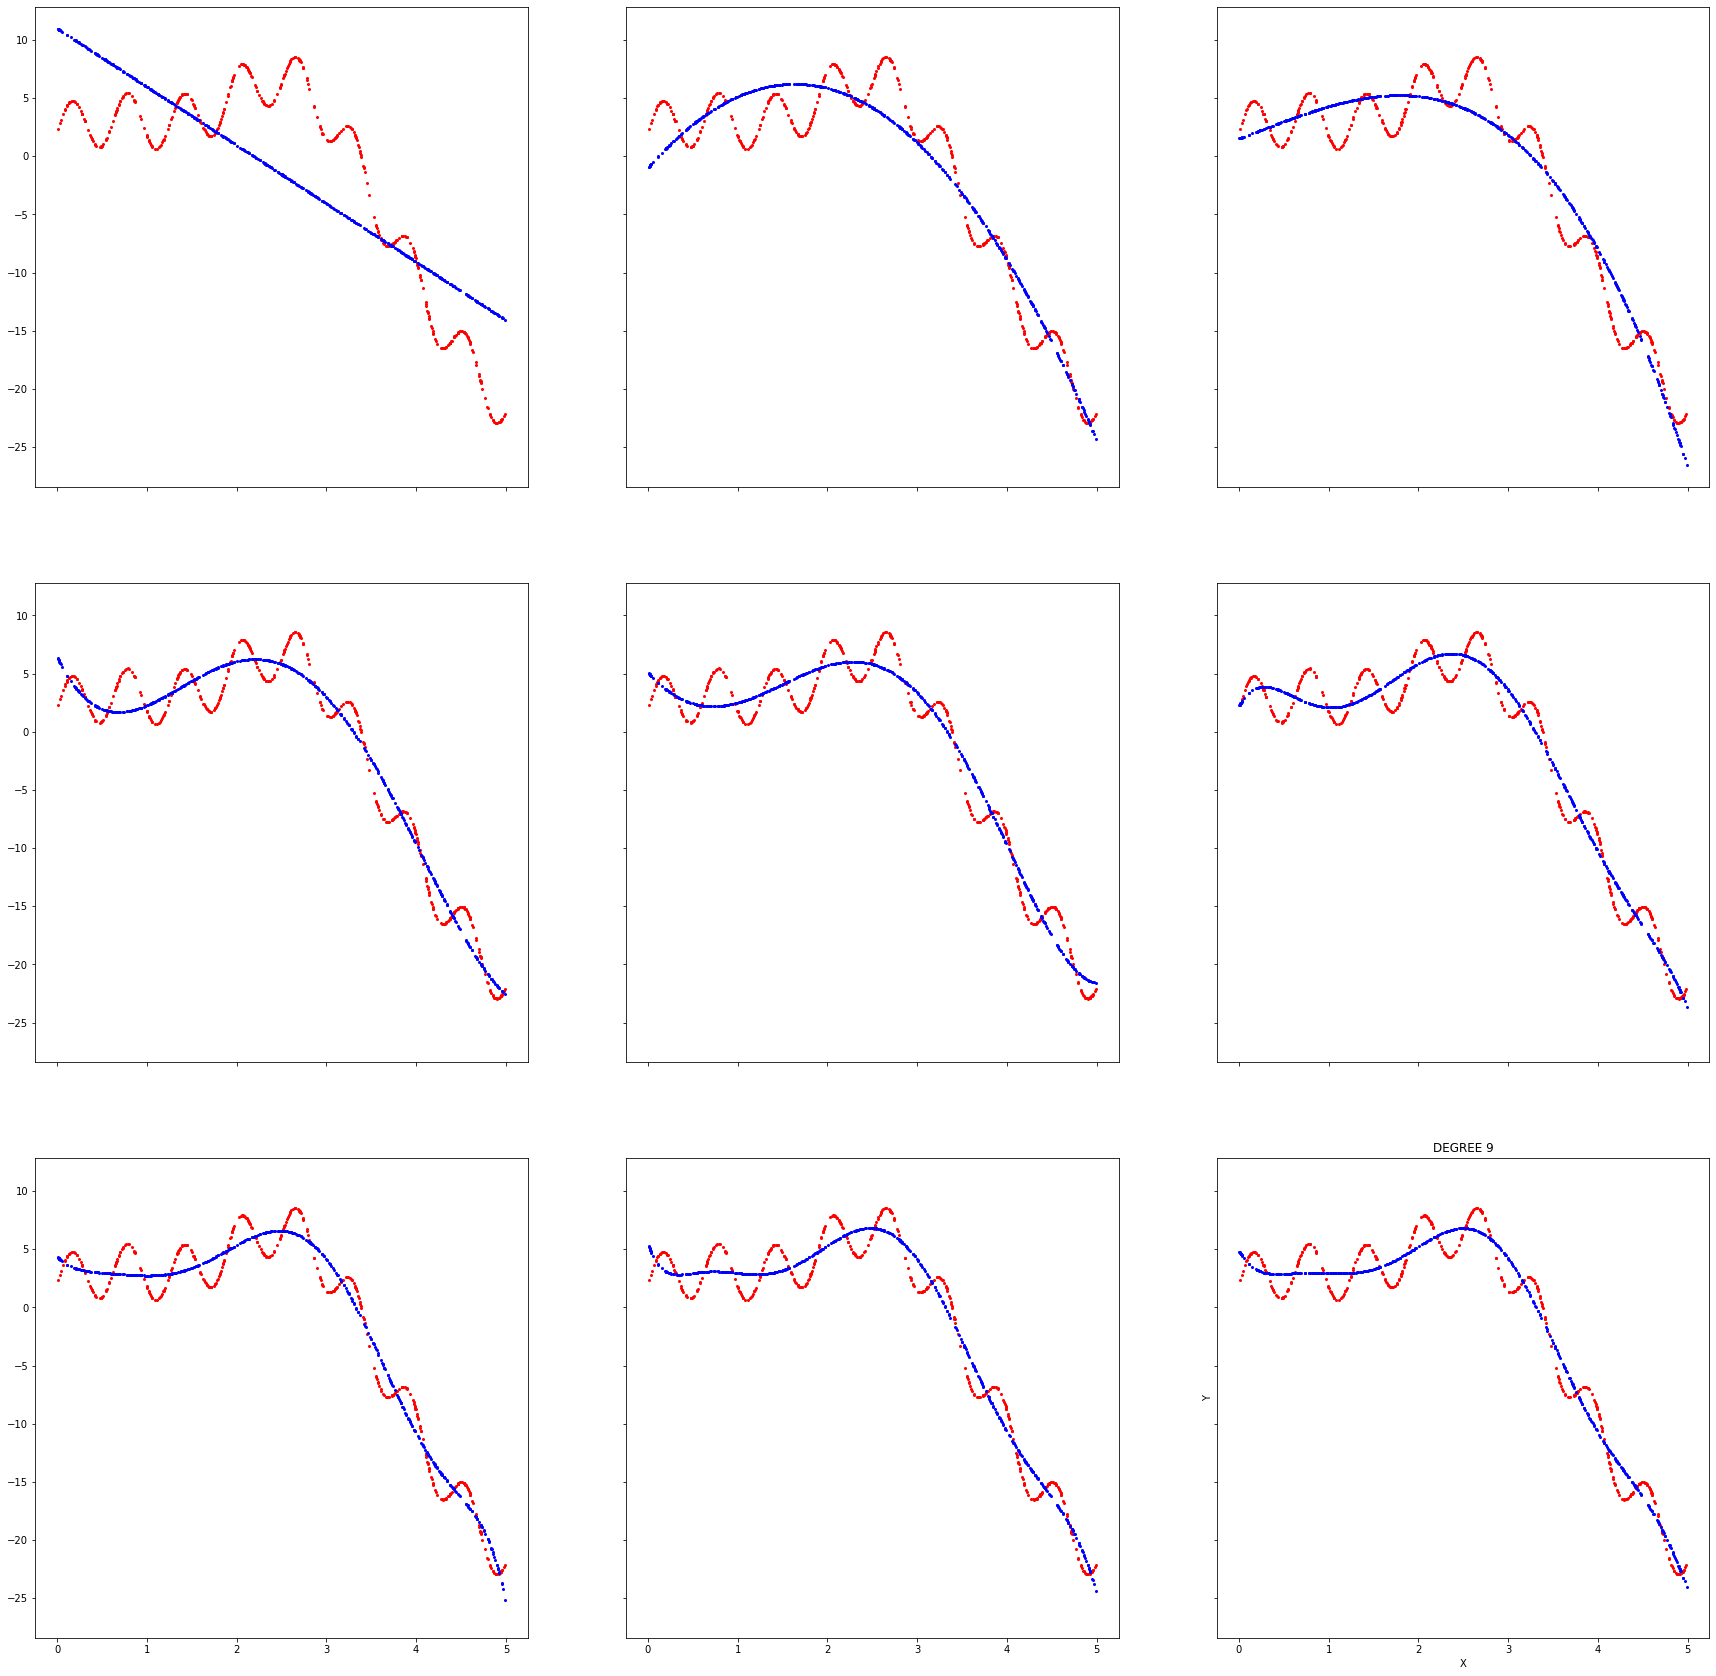

In [24]:
if(graphing == 1):
    for i in range(10):
        print("TRAINING SET ", i)
        f = plt.figure()
        f, axes = plt.subplots(nrows=3, ncols=3, sharex=True,
                               sharey=True, figsize=(30, 30))
        x = X_train_data_sets[i][:, np.newaxis]  # transposing it
        y = Y_train_data_sets[i]
        for degree in range(0, 9):
            axes[int(degree/3)][int(degree % 3)].plot(x, y, 'r.', markersize=4)
            
            #TODO: make PolynomialFeatures, fit them, make linear regression model, train it, 
            #      and finally infer using that model 
            poly_feat = PolynomialFeatures(degree = degree + 1 )
            features = poly_feat.fit_transform(x)
            poly_model = LinearRegression()
            poly_model.fit(features,y)
            y_test_predict = poly_model.predict(poly_feat.fit_transform(xTest[:,np.newaxis]))
            axes[int(degree/3)][int(degree % 3)].plot(xTest[:,
                                                            np.newaxis], y_test_predict, 'b.', markersize=4)
            plt.title("DEGREE "+str(degree+1))
            plt.xlabel("X")
            plt.ylabel("Y")
        plt.show()

# STEP 4: CALCULATE THE BIAS AND VARIANCE OF THE MODEL

# Get the list of all the predicted values

In [25]:
'''
First we get the list of all the y predicted values for all the models and for all the degrees separately in a 2-D array.
Here, for each model of each degree, we get the predicted y values for the given test datasets.
The values are stored as follows: y[train_data_set_no][degree]
'''
y_predicted = []
for i in range(10):
    x = X_train_data_sets[i][:, np.newaxis]  # transposing it
    y = Y_train_data_sets[i]
    temp = []
    for degree in range(0, 9):
      poly_features = PolynomialFeatures(degree = degree)
      X_train_poly = poly_features.fit_transform(x)
      poly_model = LinearRegression()
      poly_model.fit(X_train_poly, Y_train_data_sets[i])
      y_test_predict = poly_model.predict(poly_features.fit_transform(xTest[:,np.newaxis]))       
      temp.append(y_test_predict)
    y_predicted.append(temp)

In [26]:
X_train_data_sets[0][:, np.newaxis].shape

(450, 1)

# Function for calculating the bias and the variance

In [27]:
'''
Then we calculate the bias and variance as follows:
- For a given degree we append the values of the y_predicted for each model to a list
- Convert this list to a numpy array y_predicted_part
- Calculate the bias of this list by subtracting the mean of the model from the testing dataset
- Bias corresponding to the models of a given degree is the mean of this list
- Similarly calculate the variance of this list
- Variance corresponding to the models of a given degree is the mean of this list
'''


def find_bias_variance(order):
    y_predicted_part = []
    for i in range(10):
        y_predicted_part.append(y_predicted[i][order])
    y_predicted_part = np.asarray(y_predicted_part)
    bias = np.mean(np.abs(y_predicted_part - yTest), axis = 0)
    variance = np.var(y_predicted_part,axis =0)
    #TODO: Find the bias and the variance
    print(y_predicted_part.shape)
    return(np.mean(bias), np.mean(variance))
print (find_bias_variance(2))

(10, 500)
(2.019455389170052, 0.04072585310763499)


# Then we call the function as follows, in order to populate the lists, bias and variance.

In [28]:
bias = []
variance = []
for i in range(9):
    b, v = find_bias_variance(i)
    bias.append(b)
    variance.append(v)
print("Bias:", bias)
print("Variance:", variance)


(10, 500)
(10, 500)
(10, 500)
(10, 500)
(10, 500)
(10, 500)
(10, 500)
(10, 500)
(10, 500)
Bias: [7.450996774594879, 4.867999652704417, 2.019455389170052, 1.9039242908957963, 1.518205400316061, 1.5022541500015778, 1.4157067012648512, 1.407096177832467, 1.4201897848217664]
Variance: [0.18820342581647526, 0.211591745990212, 0.04072585310763499, 0.027401645355563727, 0.028424019716412816, 0.027779630188189124, 0.030423566408899053, 0.038503326261439354, 0.04271941215913262]


In [29]:
# The lists, bias and variance, now contain the bias and variance corresponding to a particular degree.

# Tabulate the values

# We use the pandas library in order to display the required items in a table format
final_table = dict()
final_table["DEGREE"] = range(1, 10)
final_table["BIAS"] = bias
final_table["BIAS^2"] = list(np.array(bias)**2)
final_table["VARIANCE"] = variance
final_table["MSE"] = list(np.array(
    final_table["BIAS^2"])+np.array(variance))
df = pd.DataFrame(final_table)
print(df)


   DEGREE      BIAS     BIAS^2  VARIANCE        MSE
0       1  7.450997  55.517353  0.188203  55.705556
1       2  4.868000  23.697421  0.211592  23.909012
2       3  2.019455   4.078200  0.040726   4.118926
3       4  1.903924   3.624928  0.027402   3.652329
4       5  1.518205   2.304948  0.028424   2.333372
5       6  1.502254   2.256768  0.027780   2.284547
6       7  1.415707   2.004225  0.030424   2.034649
7       8  1.407096   1.979920  0.038503   2.018423
8       9  1.420190   2.016939  0.042719   2.059658


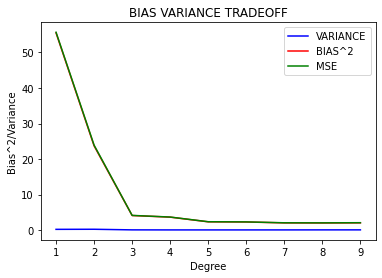

In [30]:
# Plot the bias-variance tradeoff
plt.plot(final_table["DEGREE"], final_table["VARIANCE"], color="blue")
plt.plot(final_table["DEGREE"], final_table["BIAS^2"], color="red")
plt.plot(final_table["DEGREE"], final_table["MSE"], color="green")
plt.title("BIAS VARIANCE TRADEOFF")
plt.xlabel("Degree")
plt.ylabel("Bias^2/Variance")
plt.legend(["VARIANCE", "BIAS^2", "MSE"])
plt.show()


# FITTING THE TRAINED MODEL TO THE TESTING DATASET FOR DISPLAYING THE LINE OF BEST FIT

<Figure size 432x288 with 0 Axes>

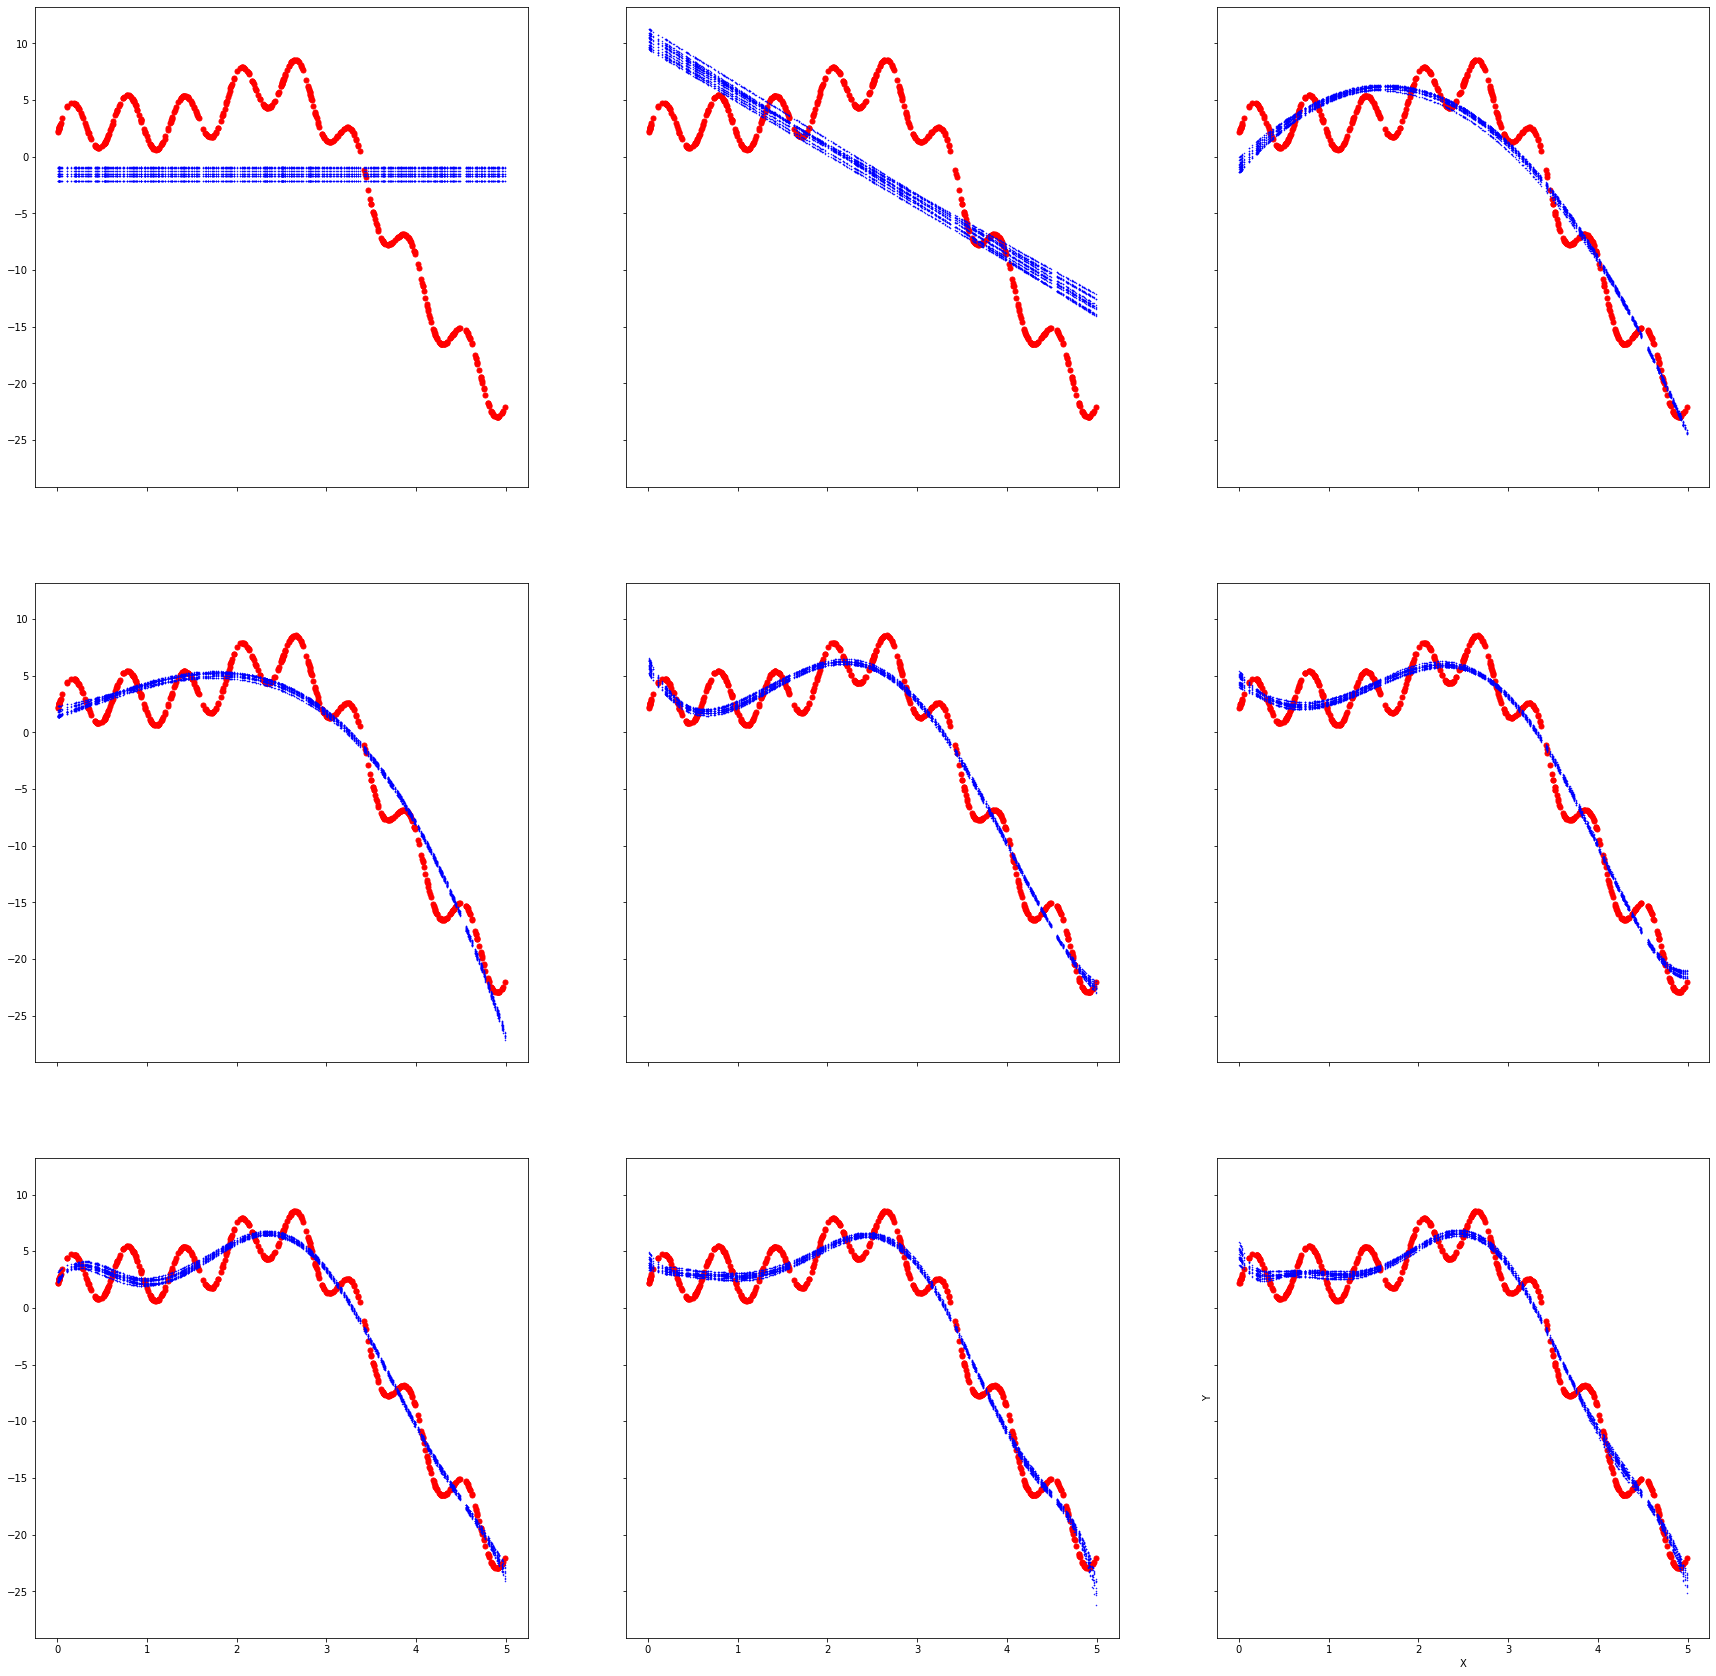

In [31]:
f = plt.figure()
f, axes = plt.subplots(nrows=3, ncols=3, sharex=True,
                       sharey=True, figsize=(30, 30))
for degree in range(0, 9):
    xtemp = np.concatenate([xTest for i in range(10)])
    y_predicted_part = []
    for i in range(10):
        y_predicted_part.append(y_predicted[i][degree])
    ytemp = np.array(y_predicted_part).reshape(-1)
    axes[int((degree)/3)][int((degree) % 3)
                          ].plot(xTest, yTest, 'r.', markersize=10)
    axes[int((degree)/3)][int((degree) % 3)
                          ].plot(xtemp, ytemp, 'b.', markersize=1)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [32]:
# Here the red line represents the actual testing data, while the blue line shows the model we have made

# IF THE BIAS IS CALCULATED AS THE RMS OF THE DIFFERENCE BETWEEN THE ACTUAL AND THE PREDICTED y VALUES

# For the explanation, refer the step 2. Also as it was mentioned in the news forum, this has been done. (no report has been done on this)

bias2 = []
variance = []
bias = []
for i in range(9):
    b, v = find_bias_variance(i)
    bias2.append(b)
    bias.append(b**0.5)
    variance.append(v)
print("Bias^2:", bias2)
print("Bias:", bias)
print("Variance:", variance)

(10, 500)
(10, 500)
(10, 500)
(10, 500)
(10, 500)
(10, 500)
(10, 500)
(10, 500)
(10, 500)
Bias^2: [7.450996774594879, 4.867999652704417, 2.019455389170052, 1.9039242908957963, 1.518205400316061, 1.5022541500015778, 1.4157067012648512, 1.407096177832467, 1.4201897848217664]
Bias: [2.729651401661919, 2.2063543805799686, 1.4210754340182128, 1.3798276308640134, 1.2321547793666432, 1.225664778804375, 1.1898347369550324, 1.1862108488091259, 1.1917171580630055]
Variance: [0.18820342581647526, 0.211591745990212, 0.04072585310763499, 0.027401645355563727, 0.028424019716412816, 0.027779630188189124, 0.030423566408899053, 0.038503326261439354, 0.04271941215913262]


In [33]:
final_table = dict()
final_table["DEGREE"] = range(1, 10)
final_table["BIAS"] = bias
final_table["BIAS^2"] = list(np.array(bias)**2)
final_table["VARIANCE"] = variance
final_table["MSE"] = list(np.array(
    final_table["BIAS^2"])+np.array(variance))
df = pd.DataFrame(final_table)
print(df)


   DEGREE      BIAS    BIAS^2  VARIANCE       MSE
0       1  2.729651  7.450997  0.188203  7.639200
1       2  2.206354  4.868000  0.211592  5.079591
2       3  1.421075  2.019455  0.040726  2.060181
3       4  1.379828  1.903924  0.027402  1.931326
4       5  1.232155  1.518205  0.028424  1.546629
5       6  1.225665  1.502254  0.027780  1.530034
6       7  1.189835  1.415707  0.030424  1.446130
7       8  1.186211  1.407096  0.038503  1.445600
8       9  1.191717  1.420190  0.042719  1.462909


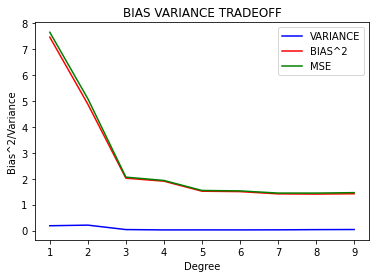

In [34]:
plt.plot(final_table["DEGREE"], final_table["VARIANCE"], color="blue")
plt.plot(final_table["DEGREE"], final_table["BIAS^2"], color="red")
plt.plot(final_table["DEGREE"], final_table["MSE"], color="green")
plt.title("BIAS VARIANCE TRADEOFF")
plt.xlabel("Degree")
plt.ylabel("Bias^2/Variance")
plt.legend(["VARIANCE", "BIAS^2", "MSE"])
plt.show()

In [35]:
print("the best model is at order 3 ")
print("greater than order 3 overfitting is happened ")
print("less than order 3 underfitting is happened ")

the best model is at order 3 
greater than order 3 overfitting is happened 
less than order 3 underfitting is happened 
